In [36]:
#Version 15.12.12023

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt

import os

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#plt.style.use('uzh')
plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = False

format_k = lambda x, pos: f'{x/10**3:,.0f}K'


def add_terra_and_ftx(ax, which= 'both'):
    if which in ['terra', 'both']:
        terra = ax.axvline(dt.datetime(2022, 5, 7), 0,0.8, color='k', lw = 0.5)
        trans = ax.transData.transform(terra.get_xydata())
        trans = ax.transAxes.inverted().transform(trans)
        terra_text = ax.text(trans[1][0]+0.01,0.6,
                s='Terra Collapse',fontsize = 'xx-small',
                rotation=90, transform=ax.transAxes)
        
    if which in ['ftx', 'both']:
        ftx = ax.axvline(dt.datetime(2022, 11, 2), 0,0.8, color='k', lw = 0.5)
        trans = ax.transData.transform(ftx.get_xydata())
        trans = ax.transAxes.inverted().transform(trans)
        terra_text = ax.text(trans[1][0]+0.01,0.6,
                s='FTX Collapse',fontsize = 'xx-small',
                rotation=90, transform=ax.transAxes)
        
    if which in ['ftx', 'both']:
        ftx = ax.axvline(dt.datetime(2023, 4, 12), 0,0.8, color='k', lw = 0.5)
        trans = ax.transData.transform(ftx.get_xydata())
        trans = ax.transAxes.inverted().transform(trans)
        terra_text = ax.text(trans[1][0]+0.01,0.6,
                s='Shanghai Upgrade',fontsize = 'xx-small',
                rotation=90, transform=ax.transAxes)
        
    if which in ['ftx', 'both']:
        ftx = ax.axvline(dt.datetime(2022, 9, 15), 0,0.8, color='k', lw = 0.5)
        trans = ax.transData.transform(ftx.get_xydata())
        trans = ax.transAxes.inverted().transform(trans)
        terra_text = ax.text(trans[1][0]+0.01,0.6,
                s='The Merge',fontsize = 'xx-small',
                rotation=90, transform=ax.transAxes)



In [37]:
def transform_to_daily(df, col):
   df = df.copy()
   df = df.sort_index()
   days_ = [str(date) for date in sorted(set(df.index.date.tolist()))]
   df_daily = {}
   for day in days_:
      df_daily[day]={} 
      df_daily[day]['open']=df.loc[day][col][0]
      df_daily[day]['close']=df.loc[day][col][-1]
      df_daily[day]['high']=df.loc[day][col].max()
      df_daily[day]['low']=df.loc[day][col].min()
   df_daily = pd.DataFrame.from_dict(df_daily, orient='index')
   df_daily.index = pd.to_datetime(df_daily.index)
   return df_daily

def hex_to_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv+1, lv // 3))




In [38]:
def transform_to_daily(df, col):
   df = df.copy()
   df = df.sort_index()
   days_ = [str(date) for date in sorted(set(df.index.date.tolist()))]
   df_daily = {}
   for day in days_:
      df_daily[day]={} 
      df_daily[day]['open']=df.loc[day][col][0]
      df_daily[day]['close']=df.loc[day][col][-1]
      df_daily[day]['high']=df.loc[day][col].max()
      df_daily[day]['low']=df.loc[day][col].min()
   df_daily = pd.DataFrame.from_dict(df_daily, orient='index')
   df_daily.index = pd.to_datetime(df_daily.index)
   return df_daily

def hex_to_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv+1, lv // 3))

def resample_stock_data(df, timedelta):
    # make a copy
    df = df.copy()

    # convert index to datetime
    df.index = pd.to_datetime(df.index)

    # sort the index (evidently required by resample())
    df = df.sort_index()


    aggregation_dict = {
        'reth': 'mean', 
         'open': 'sum', 
         'high': 'sum',
         'low': 'sum',
         'close': 'sum',
         'Adj_Close': 'sum'
    }

    rename_dict = {
        'open': 'first',
        'high': 'max_price',
        'low': 'min_price',
        'close': 'last_price',
        'volume': 'vol (shares)',
        'Adj_Close': 'last',
    }


    return (df
      .resample(timedelta)
      .agg(aggregation_dict)
      .rename(columns=rename_dict)
    )



In [39]:
import os
data = []
cwd = os.getcwd()
xls = pd.ExcelFile('data/xls/LSD Data ETH.xlsx')
tokens = ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']
#print(xls.sheet_names)
data_eth_xlsx = []
for sheet in ['ETH', 'wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    _df = xls.parse(sheet)
    _df.dropna(subset=['Date'], inplace=True)
    _df['Date']=pd.to_datetime(_df['Date'])
    _df=_df.set_index('Date')
    _df.columns = _df.columns.str.lower()
    _df.token = sheet
    data_eth_xlsx.append(_df)
   
_df = pd.read_csv('data/ETH_STORE_DATA.csv')
#_df = xls.parse('ETH-USD')
print(_df.columns)
_df.dropna(subset=['Date'], inplace=True)
_df['Date']=pd.to_datetime(_df['Date'], format="%d.%m.%Y")
_df=_df.set_index('Date')
_df.columns = _df.columns.str.lower()
_df.token = 'ETH-interest'
interest =  _df.copy()

result = pd.concat([d.close for d in data_eth_xlsx], axis=1, join="outer", keys= [d.token for d in data_eth_xlsx])

result = result.div(result['ETH'].values,axis=0)
result = result.drop('ETH', axis=1)
interest['daily']=(1+np.array(interest['eth.store'])/100)**(1/365)
interest['daily_accrued']= interest['daily'].cumprod()

#interest['daily_ETH_change']=interest['adj close'].pct_change(1)
#interest['daily_accrued_ETH']= (1+interest['daily_ETH_change']).cumprod()
#interest['monthly_ETH_std'] = interest['daily_ETH_change'].rolling(30).std()
#interest['daily_ETH_std_change'] = interest['monthly_ETH_std'].pct_change(1)

result_with_interest = pd.concat([result, interest.daily], axis=1, join="outer")
result_with_interest.dropna(subset=['wstETH'], inplace=True)
result_with_interest['daily_accrued']= result_with_interest['daily'].cumprod()

_df = result_with_interest.copy()
adjusted_results = result_with_interest.copy()
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    adjusted_results[col]= (adjusted_results[col]/_df.loc[(min(_df[_df[col].notnull()].index.tolist()))][col])*_df.loc[(min(_df[_df[col].notnull()].index.tolist()))]['daily_accrued']



Index(['Date', 'ETH.STORE', 'ETH staking % per day', 'ETH compound'], dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


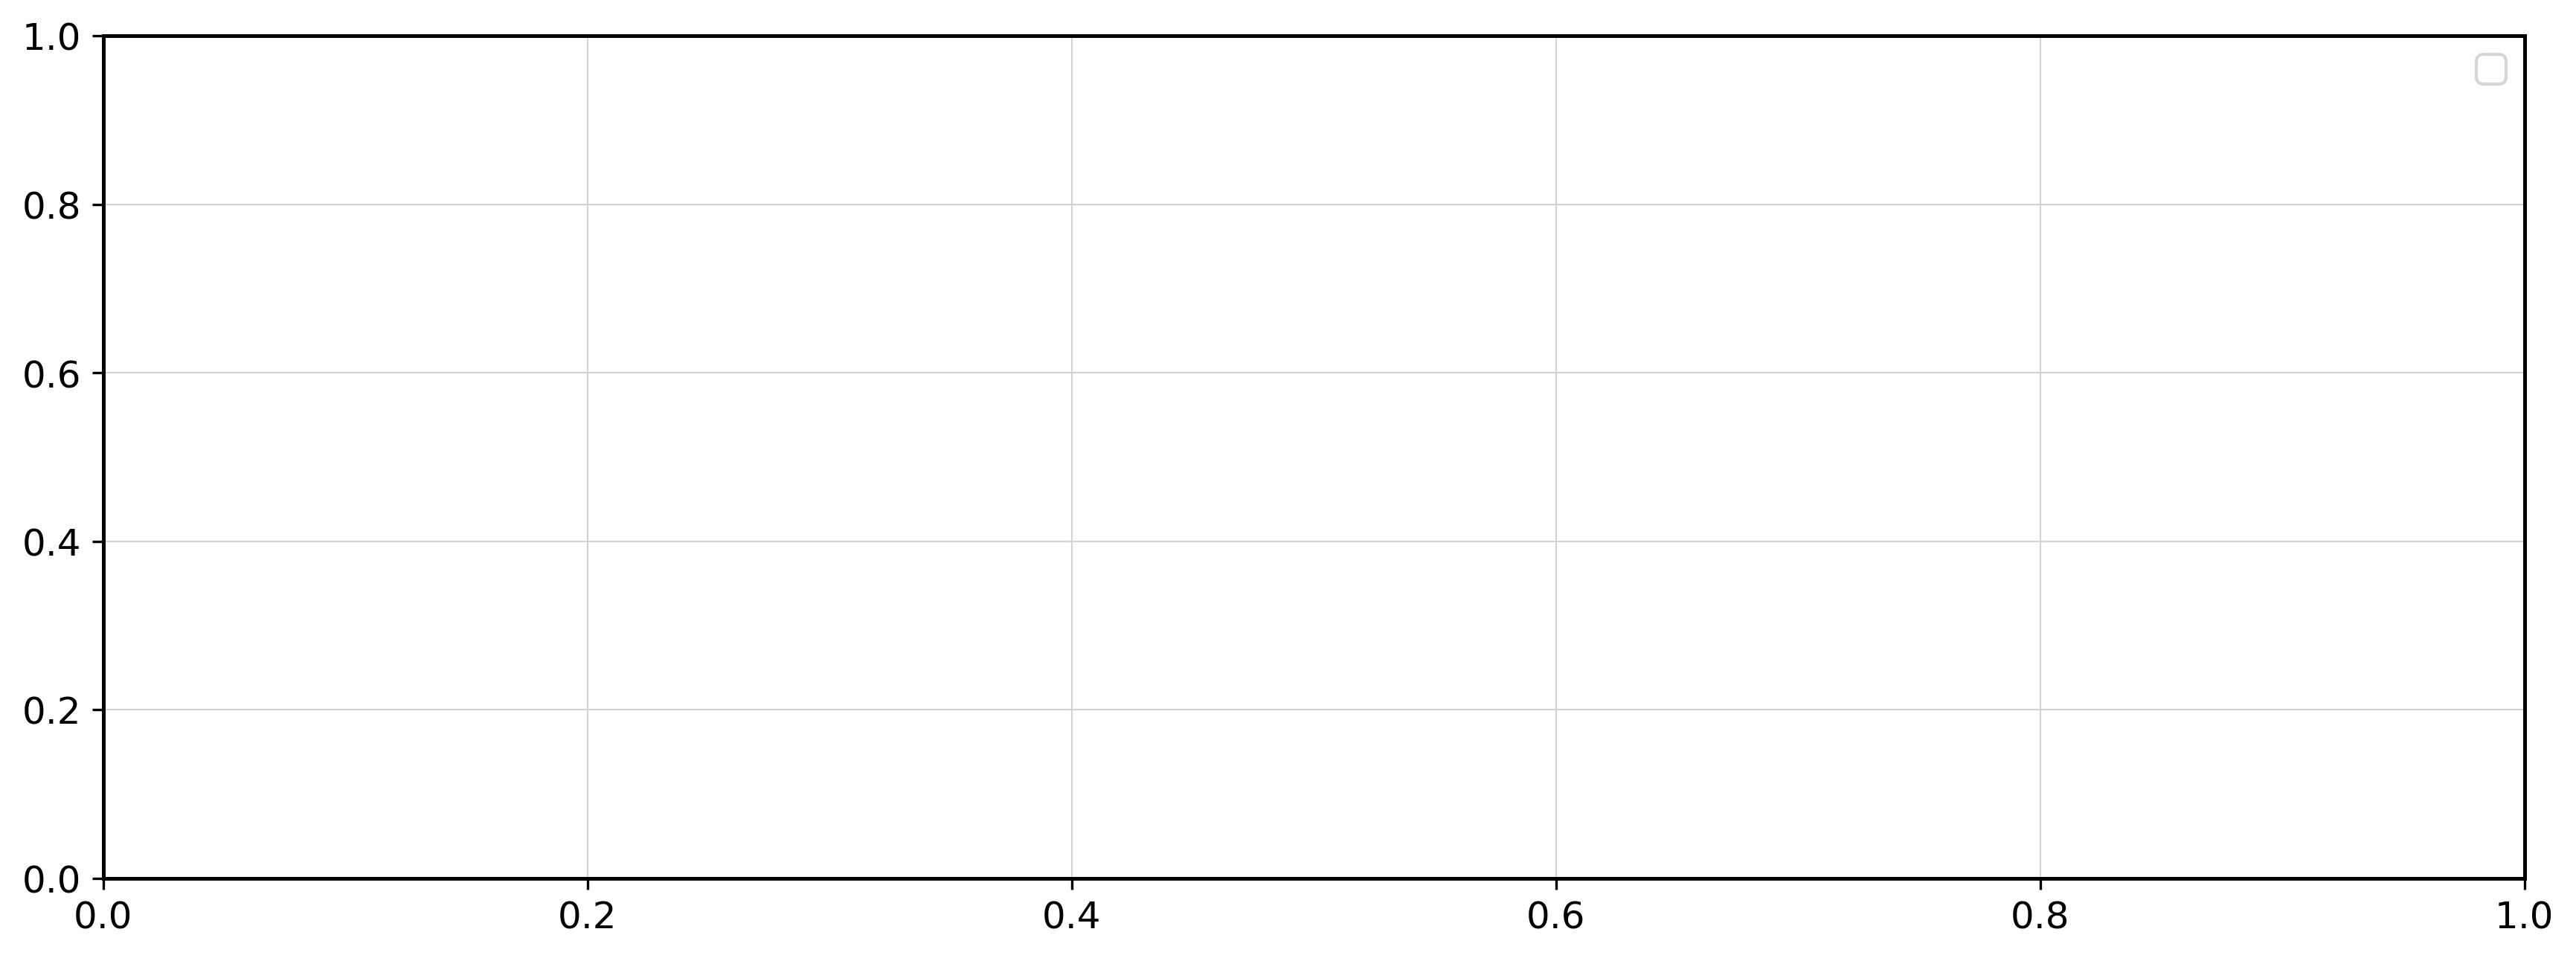

In [40]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for cur in data:
    if cur.currency_pair in ['SD_WETH','WETH_RPL','SWISE_WETH', 'ETH_sETH2']:
        continue
    ax.plot(cur.index, cur.close, lw=1, label = cur.currency_pair)

ax.set_axisbelow(True)
#ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
#ax.set_ylim(1,1.1)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

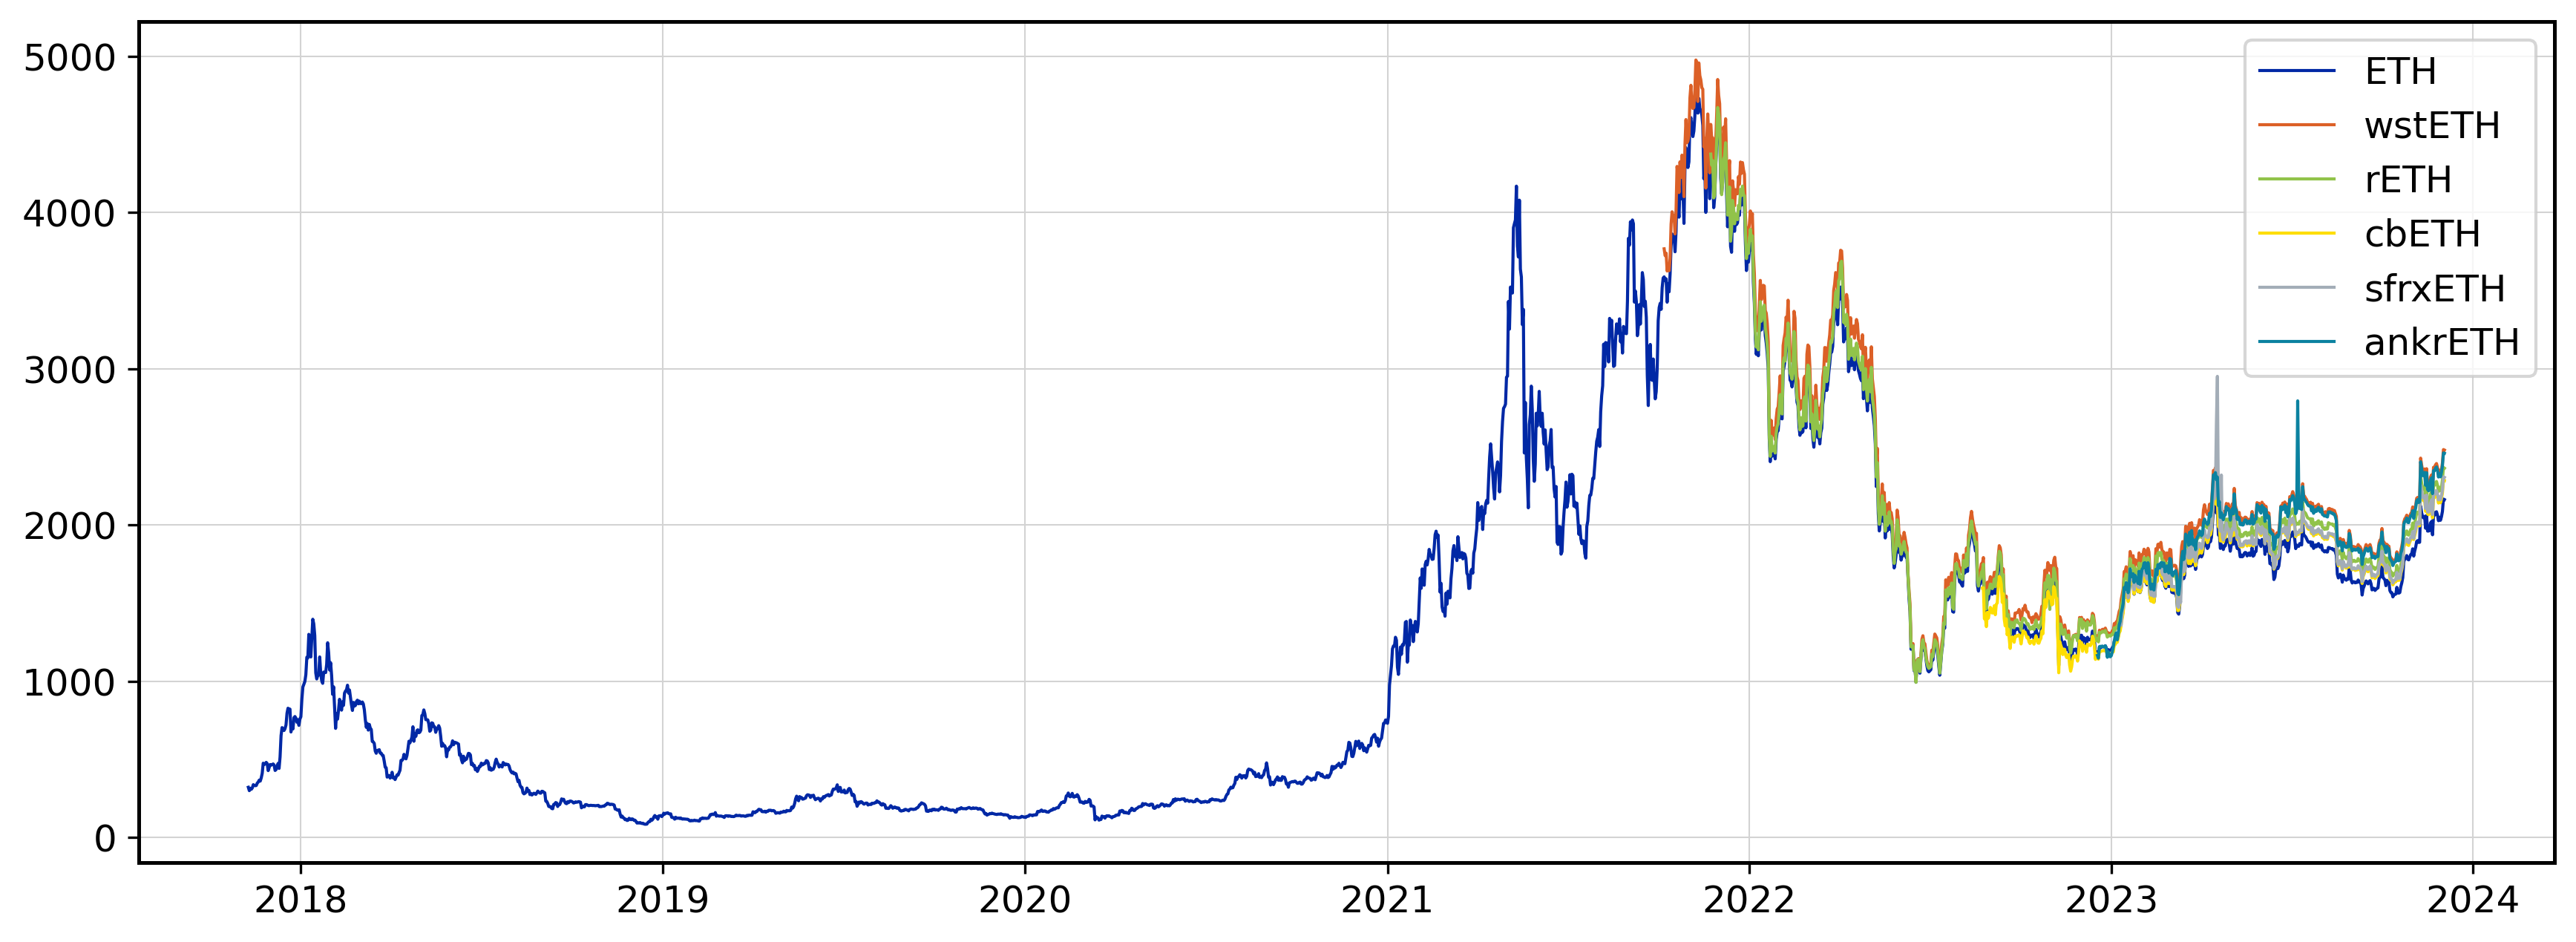

In [41]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for cur in data_eth_xlsx:
    ax.plot(cur.index, cur.close, lw=1, label = cur.token)

ax.set_axisbelow(True)
#ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
#ax.set_ylim(1,1.1)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [42]:

result = pd.concat([d.close for d in data_eth_xlsx], axis=1, join="outer", keys= [d.token for d in data_eth_xlsx])

result = result.div(result['ETH'].values,axis=0)
result = result.drop('ETH', axis=1)


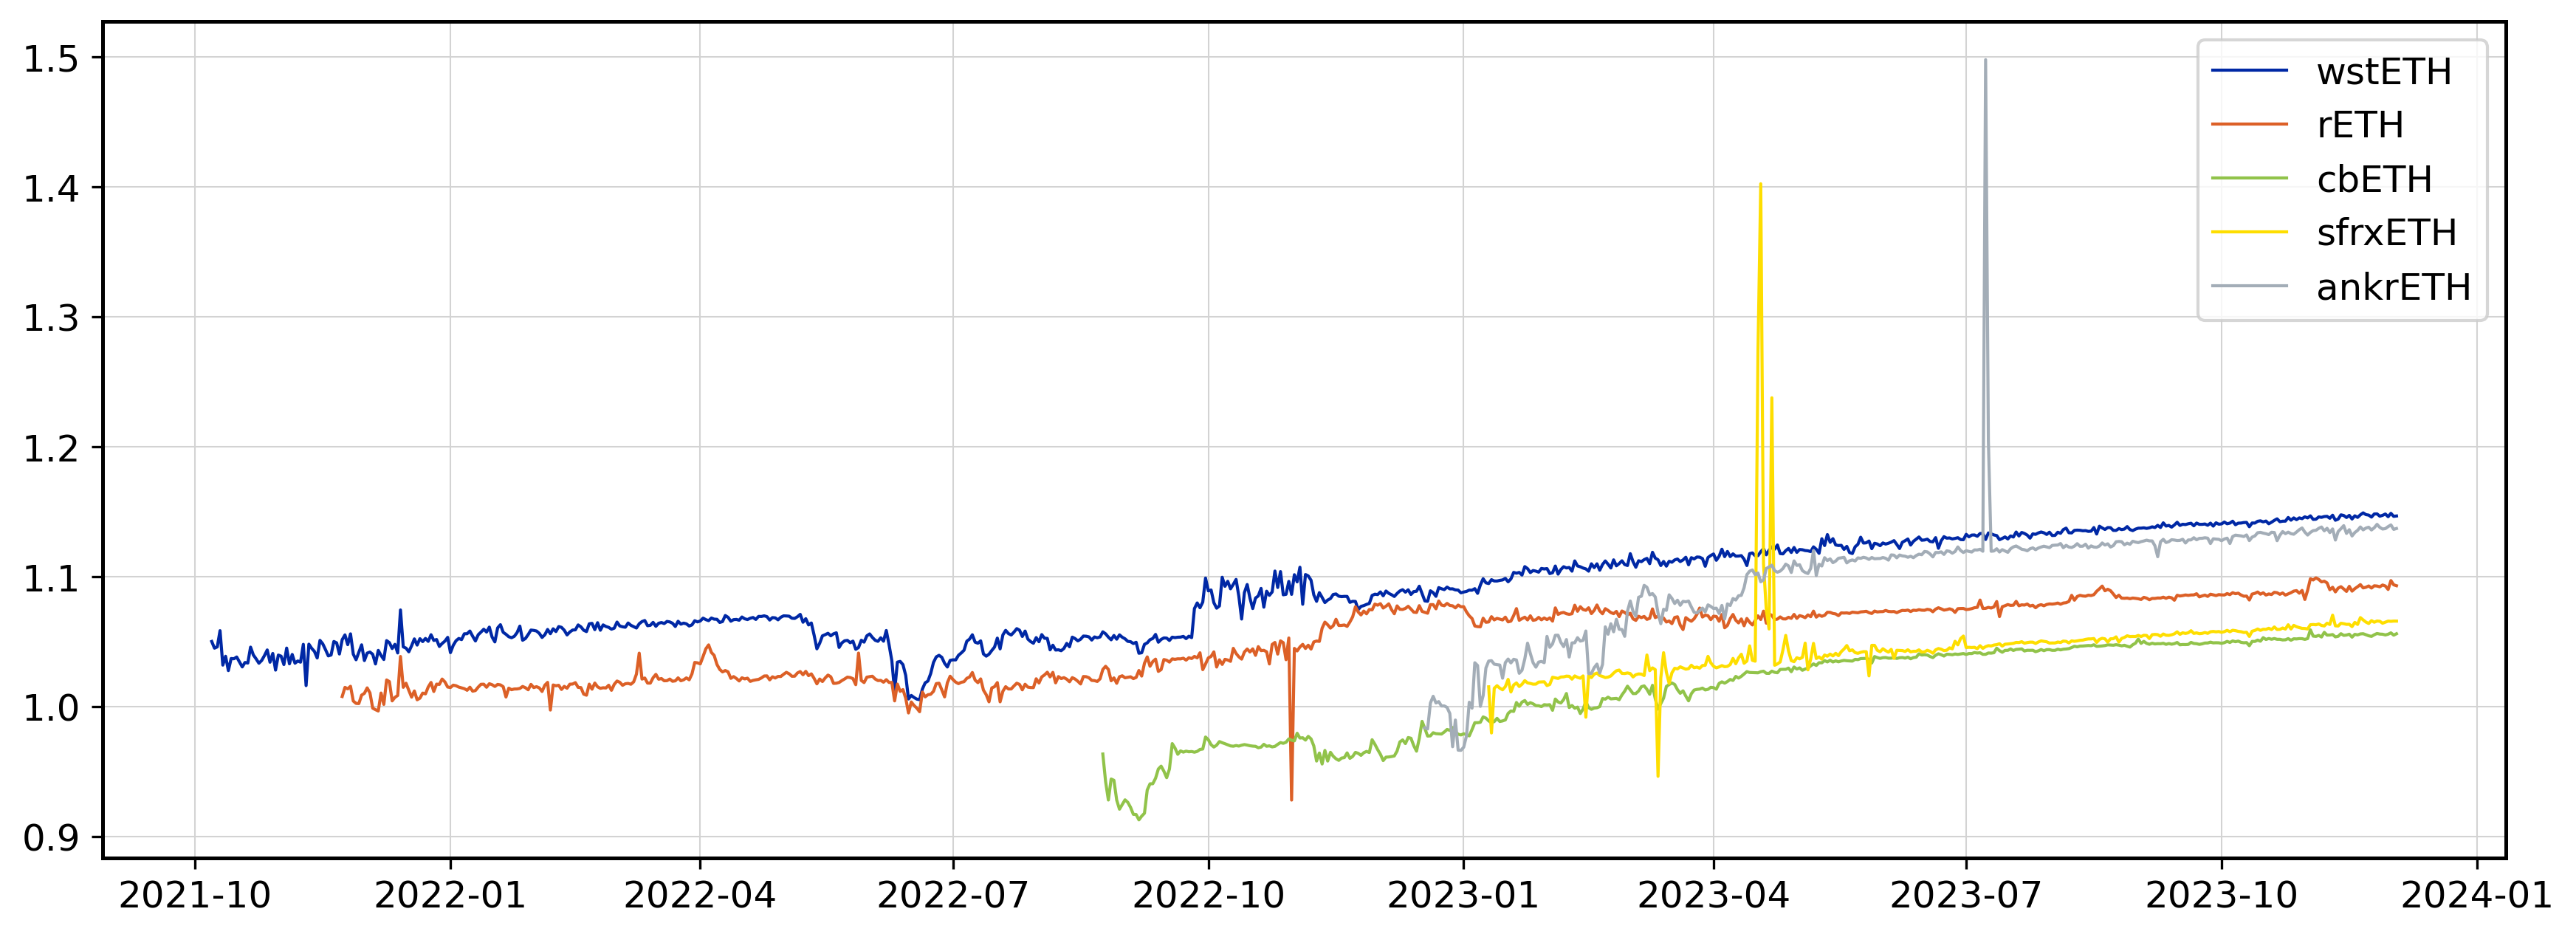

In [43]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

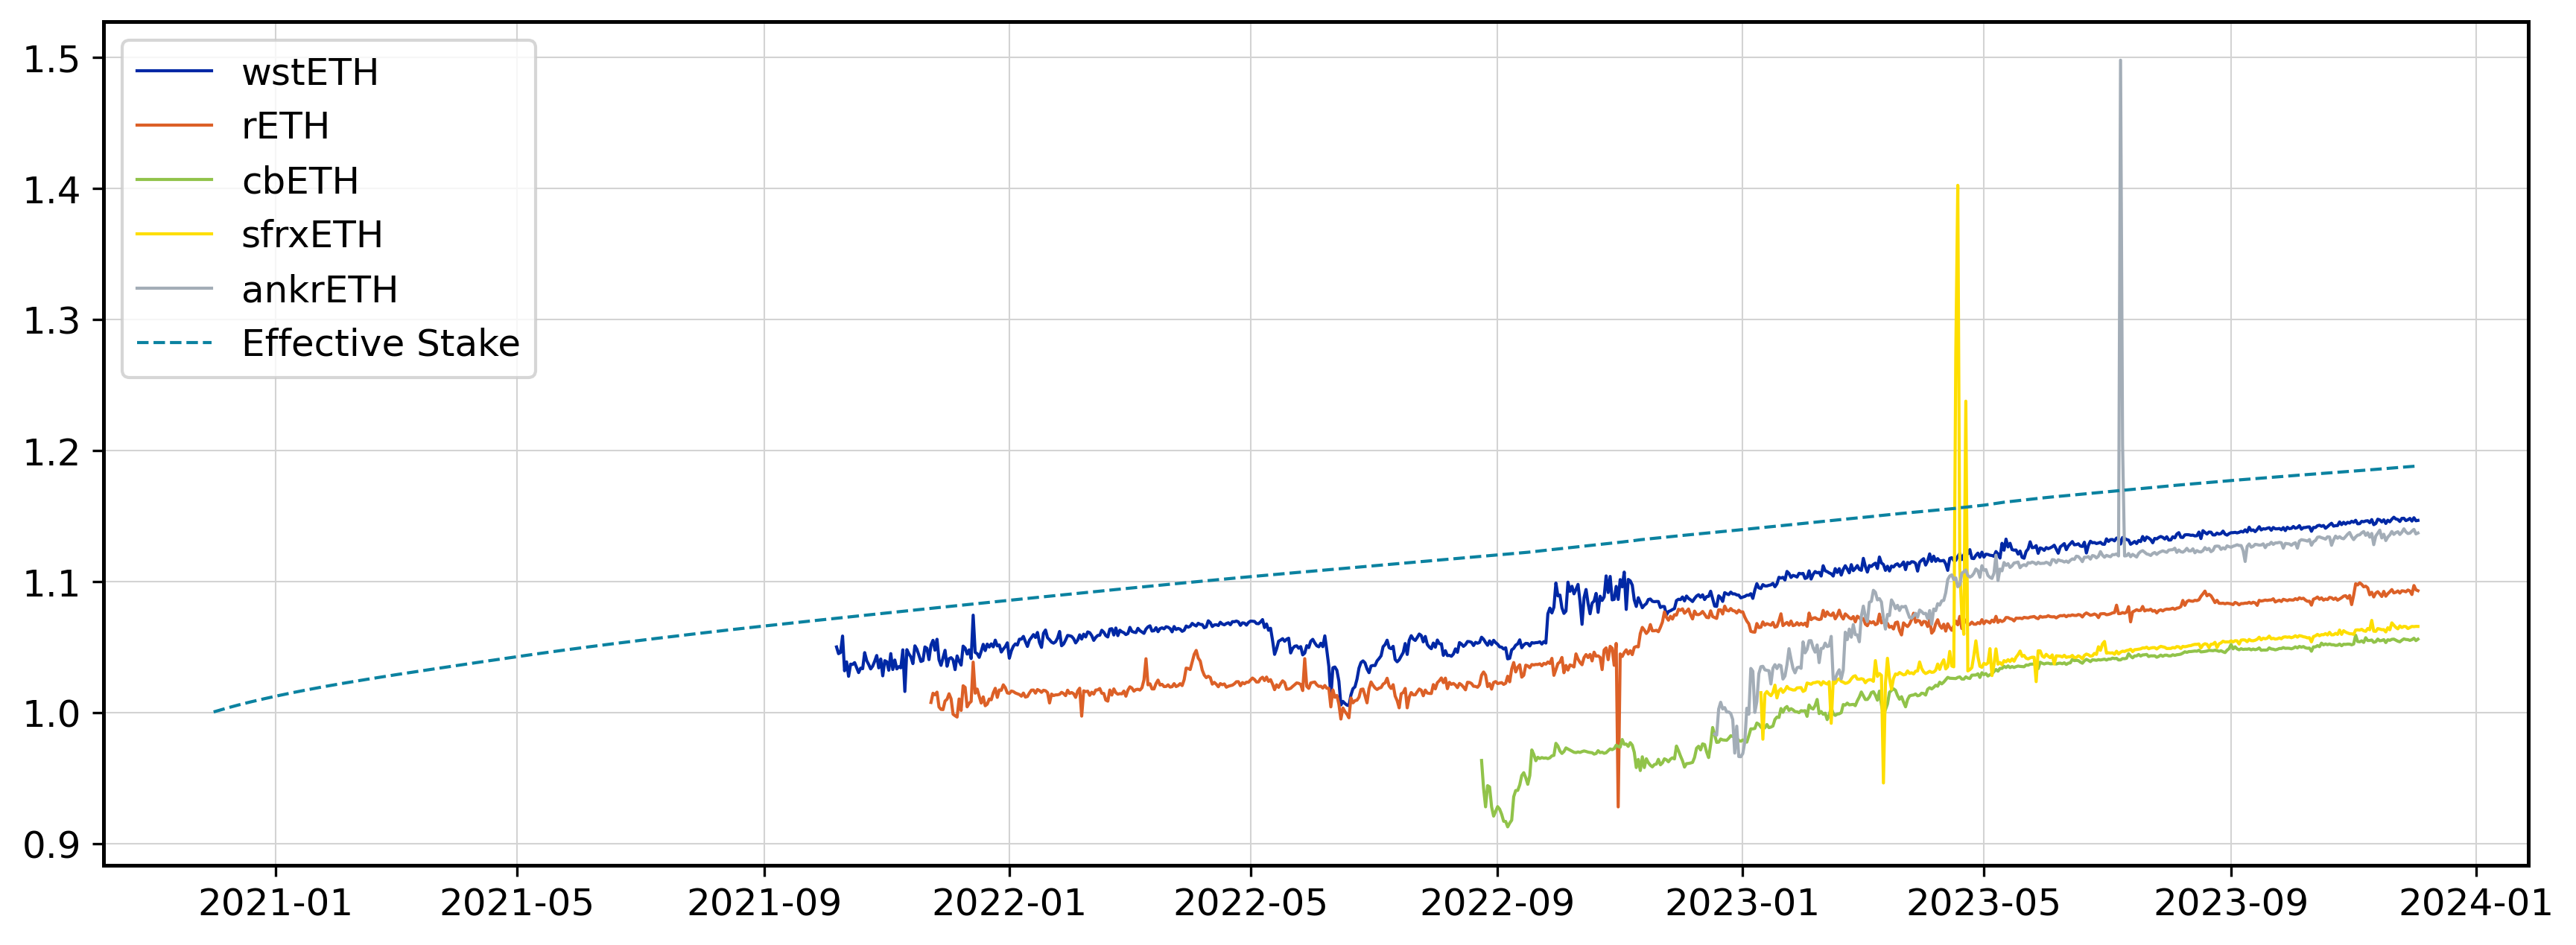

In [44]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.plot(interest.index, interest['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [45]:
result_with_interest = pd.concat([result, interest.daily], axis=1, join="outer")
result_with_interest.dropna(subset=['wstETH'], inplace=True)
result_with_interest['daily_accrued']= result_with_interest['daily'].cumprod()

In [46]:
result_with_interest

,wstETH,rETH,cbETH,sfrxETH,ankrETH,daily,daily_accrued
Date,,,,,,,
2021-10-07,1.050049,NaN,NaN,NaN,NaN,1.000151,1.000151
2021-10-08,1.044903,NaN,NaN,NaN,NaN,1.000152,1.000303
2021-10-09,1.045851,NaN,NaN,NaN,NaN,1.000151,1.000454
2021-10-10,1.058360,NaN,NaN,NaN,NaN,1.000150,1.000604
2021-10-11,1.031851,NaN,NaN,NaN,NaN,1.000151,1.000756
...,...,...,...,...,...,...,...
2023-11-29,1.148151,1.092747,1.055055,1.064905,1.136914,1.000105,1.108130
2023-11-30,1.146087,1.090070,1.055630,1.065708,1.138457,1.000105,1.108247
2023-12-01,1.148664,1.096905,1.056685,1.065537,1.139745,1.000105,1.108363


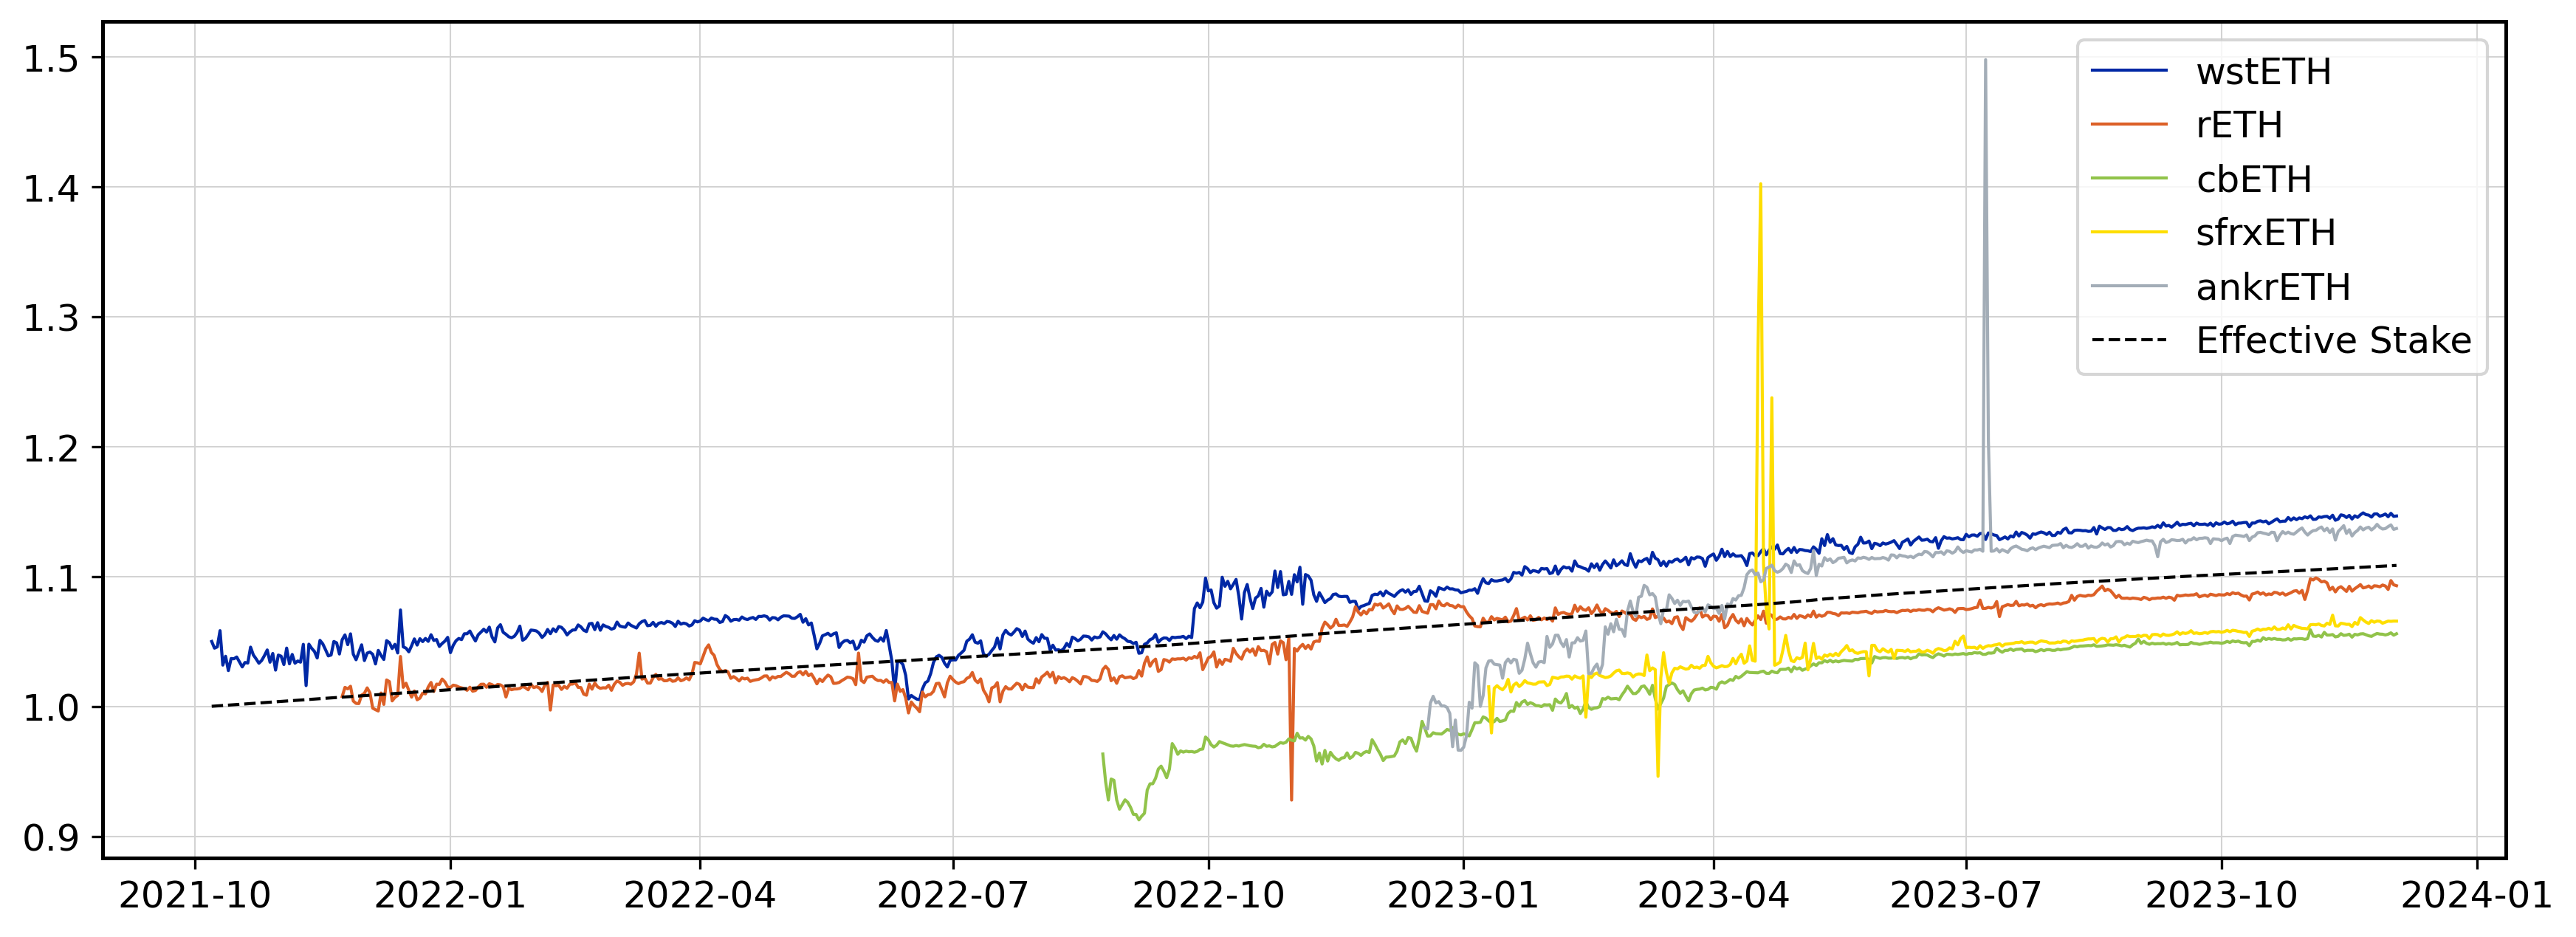

In [47]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot.index, data_to_plot[col].rolling(window=1).mean(), lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1,color='k', ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

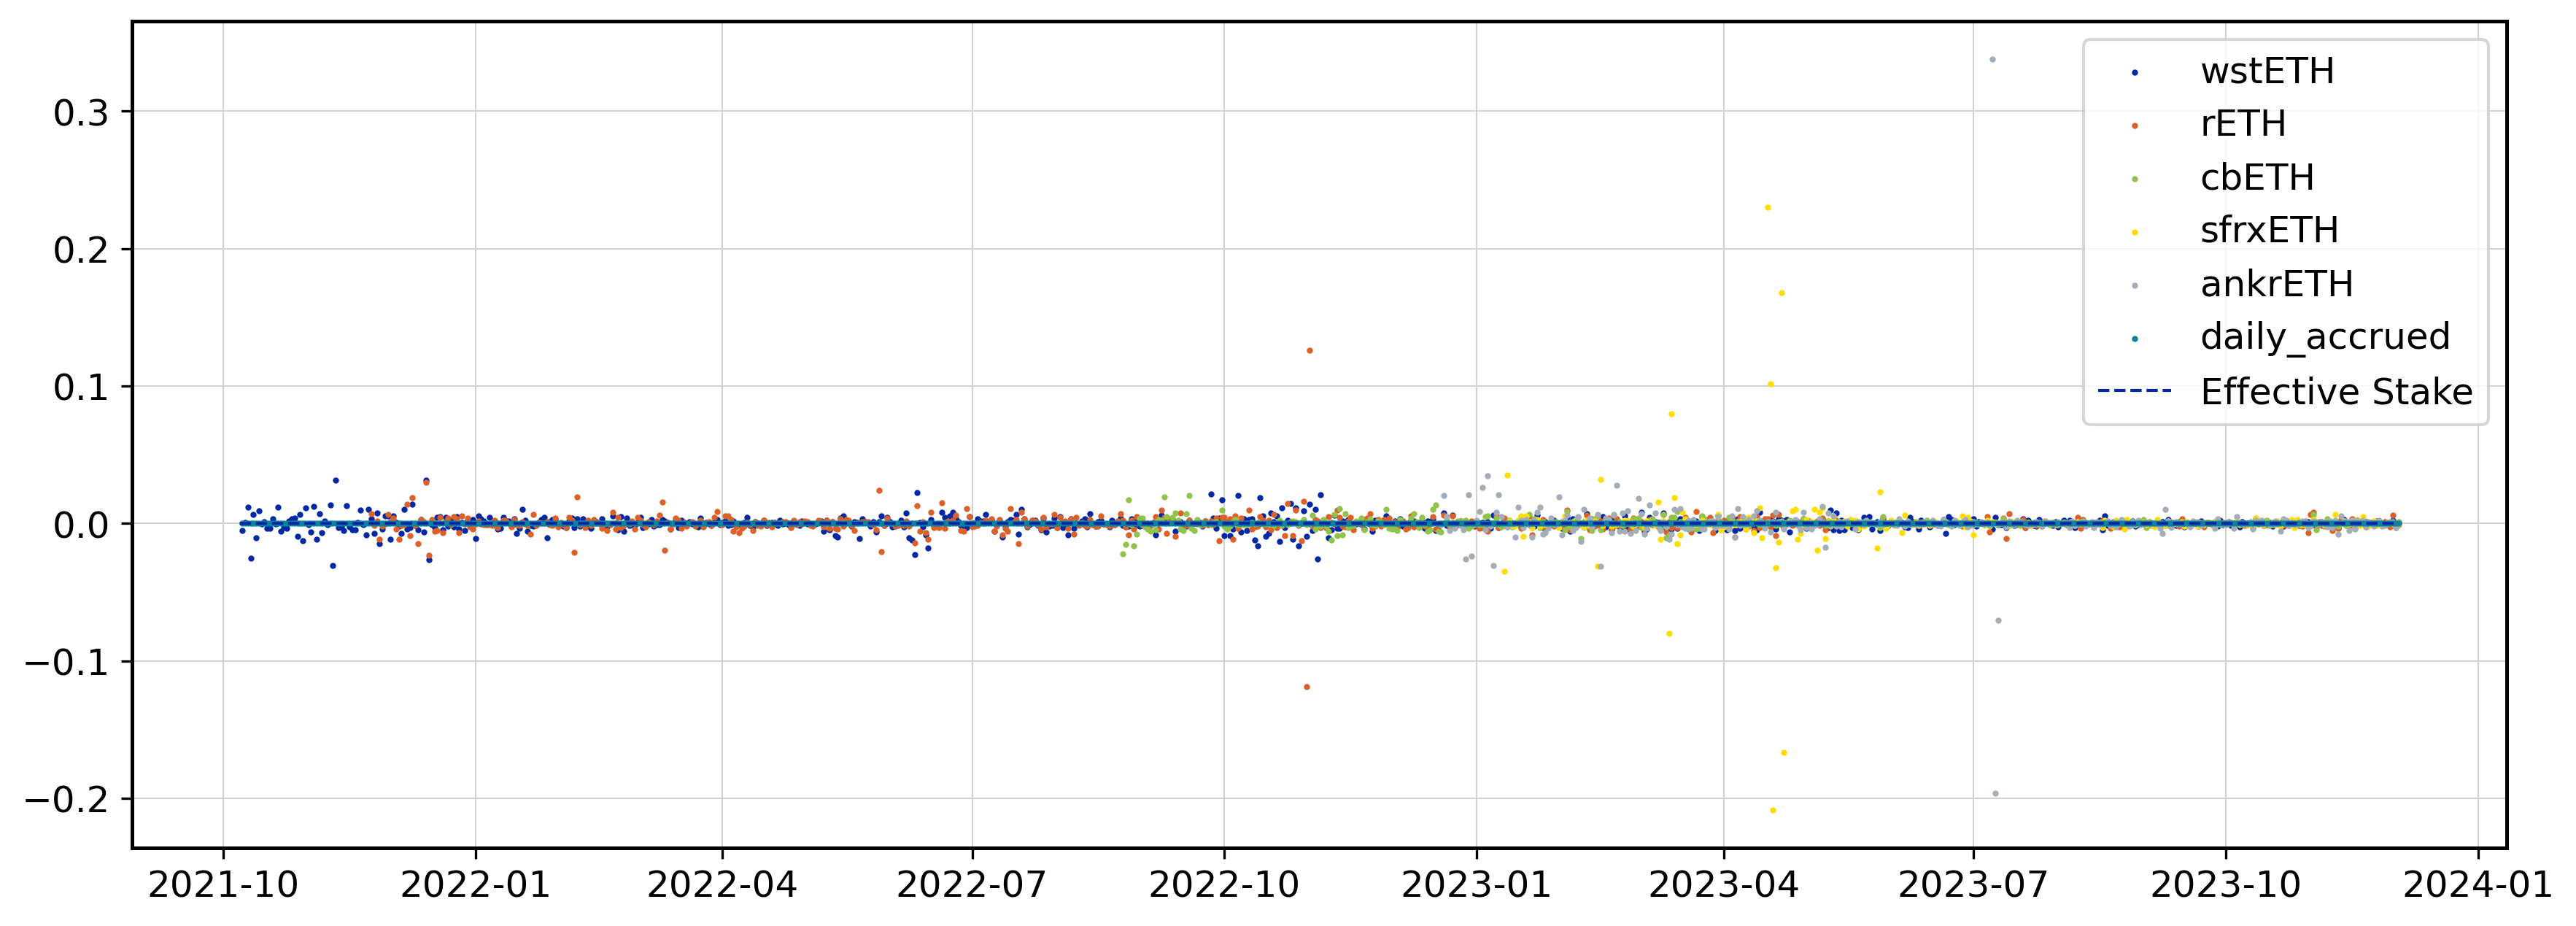

In [48]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col == 'daily':
        continue
    ax.scatter(data_to_plot.index, data_to_plot[col].pct_change(1), s=1,lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily']-1, lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

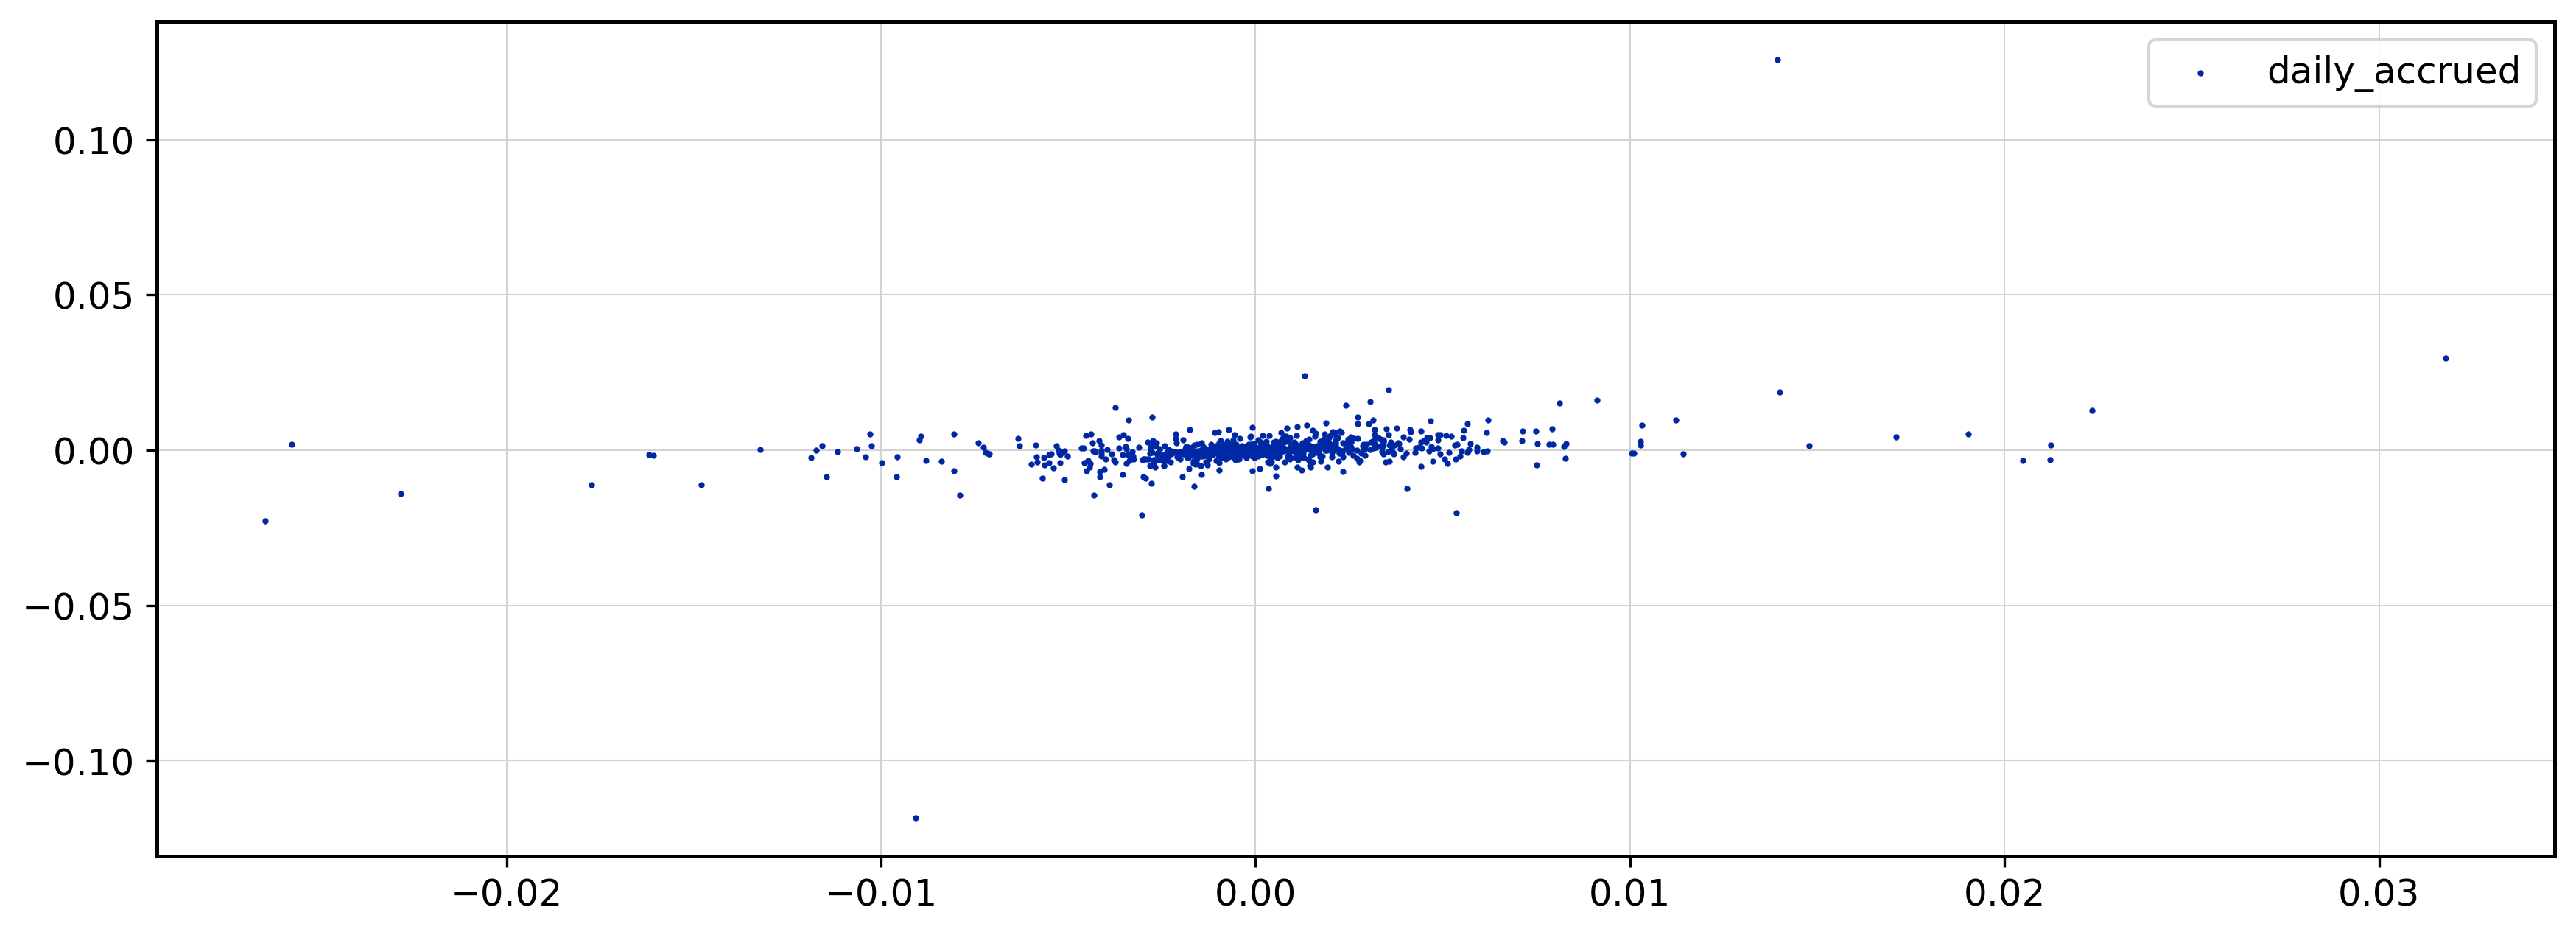

In [49]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

ax.scatter(data_to_plot['wstETH'].pct_change(1), data_to_plot['rETH'].pct_change(1), s=1,lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily']-1, lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [50]:
data_to_plot.pct_change(1).describe()

,wstETH,rETH,cbETH,sfrxETH,ankrETH,daily,daily_accrued
count,787.000000,740.000000,466.000000,327.000000,350.000000,7.870000e+02,787.000000
mean,0.000125,0.000139,0.000203,0.000433,0.000637,-6.664802e-08,0.000131
std,0.005074,0.007658,0.003451,0.023859,0.022084,8.088617e-06,0.000018
min,-0.030312,-0.118502,-0.022028,-0.208565,-0.195931,-6.831150e-05,0.000091
25%,-0.001768,-0.001556,-0.000809,-0.000917,-0.001377,-1.040754e-06,0.000120
50%,0.000110,0.000052,0.000109,0.000119,0.000204,-2.622387e-08,0.000131
75%,0.002055,0.001689,0.001040,0.001227,0.001655,7.233497e-07,0.000143
max,0.031769,0.125810,0.020604,0.229949,0.337978,7.397180e-05,0.000226


In [51]:
#df[df['A'].isnull()].index.tolist()

In [52]:
_df = result_with_interest.copy()
adjusted_results = result_with_interest.copy()
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    adjusted_results[col]= (adjusted_results[col]/_df.loc[(min(_df[_df[col].notnull()].index.tolist()))][col])*_df.loc[(min(_df[_df[col].notnull()].index.tolist()))]['daily_accrued']


    

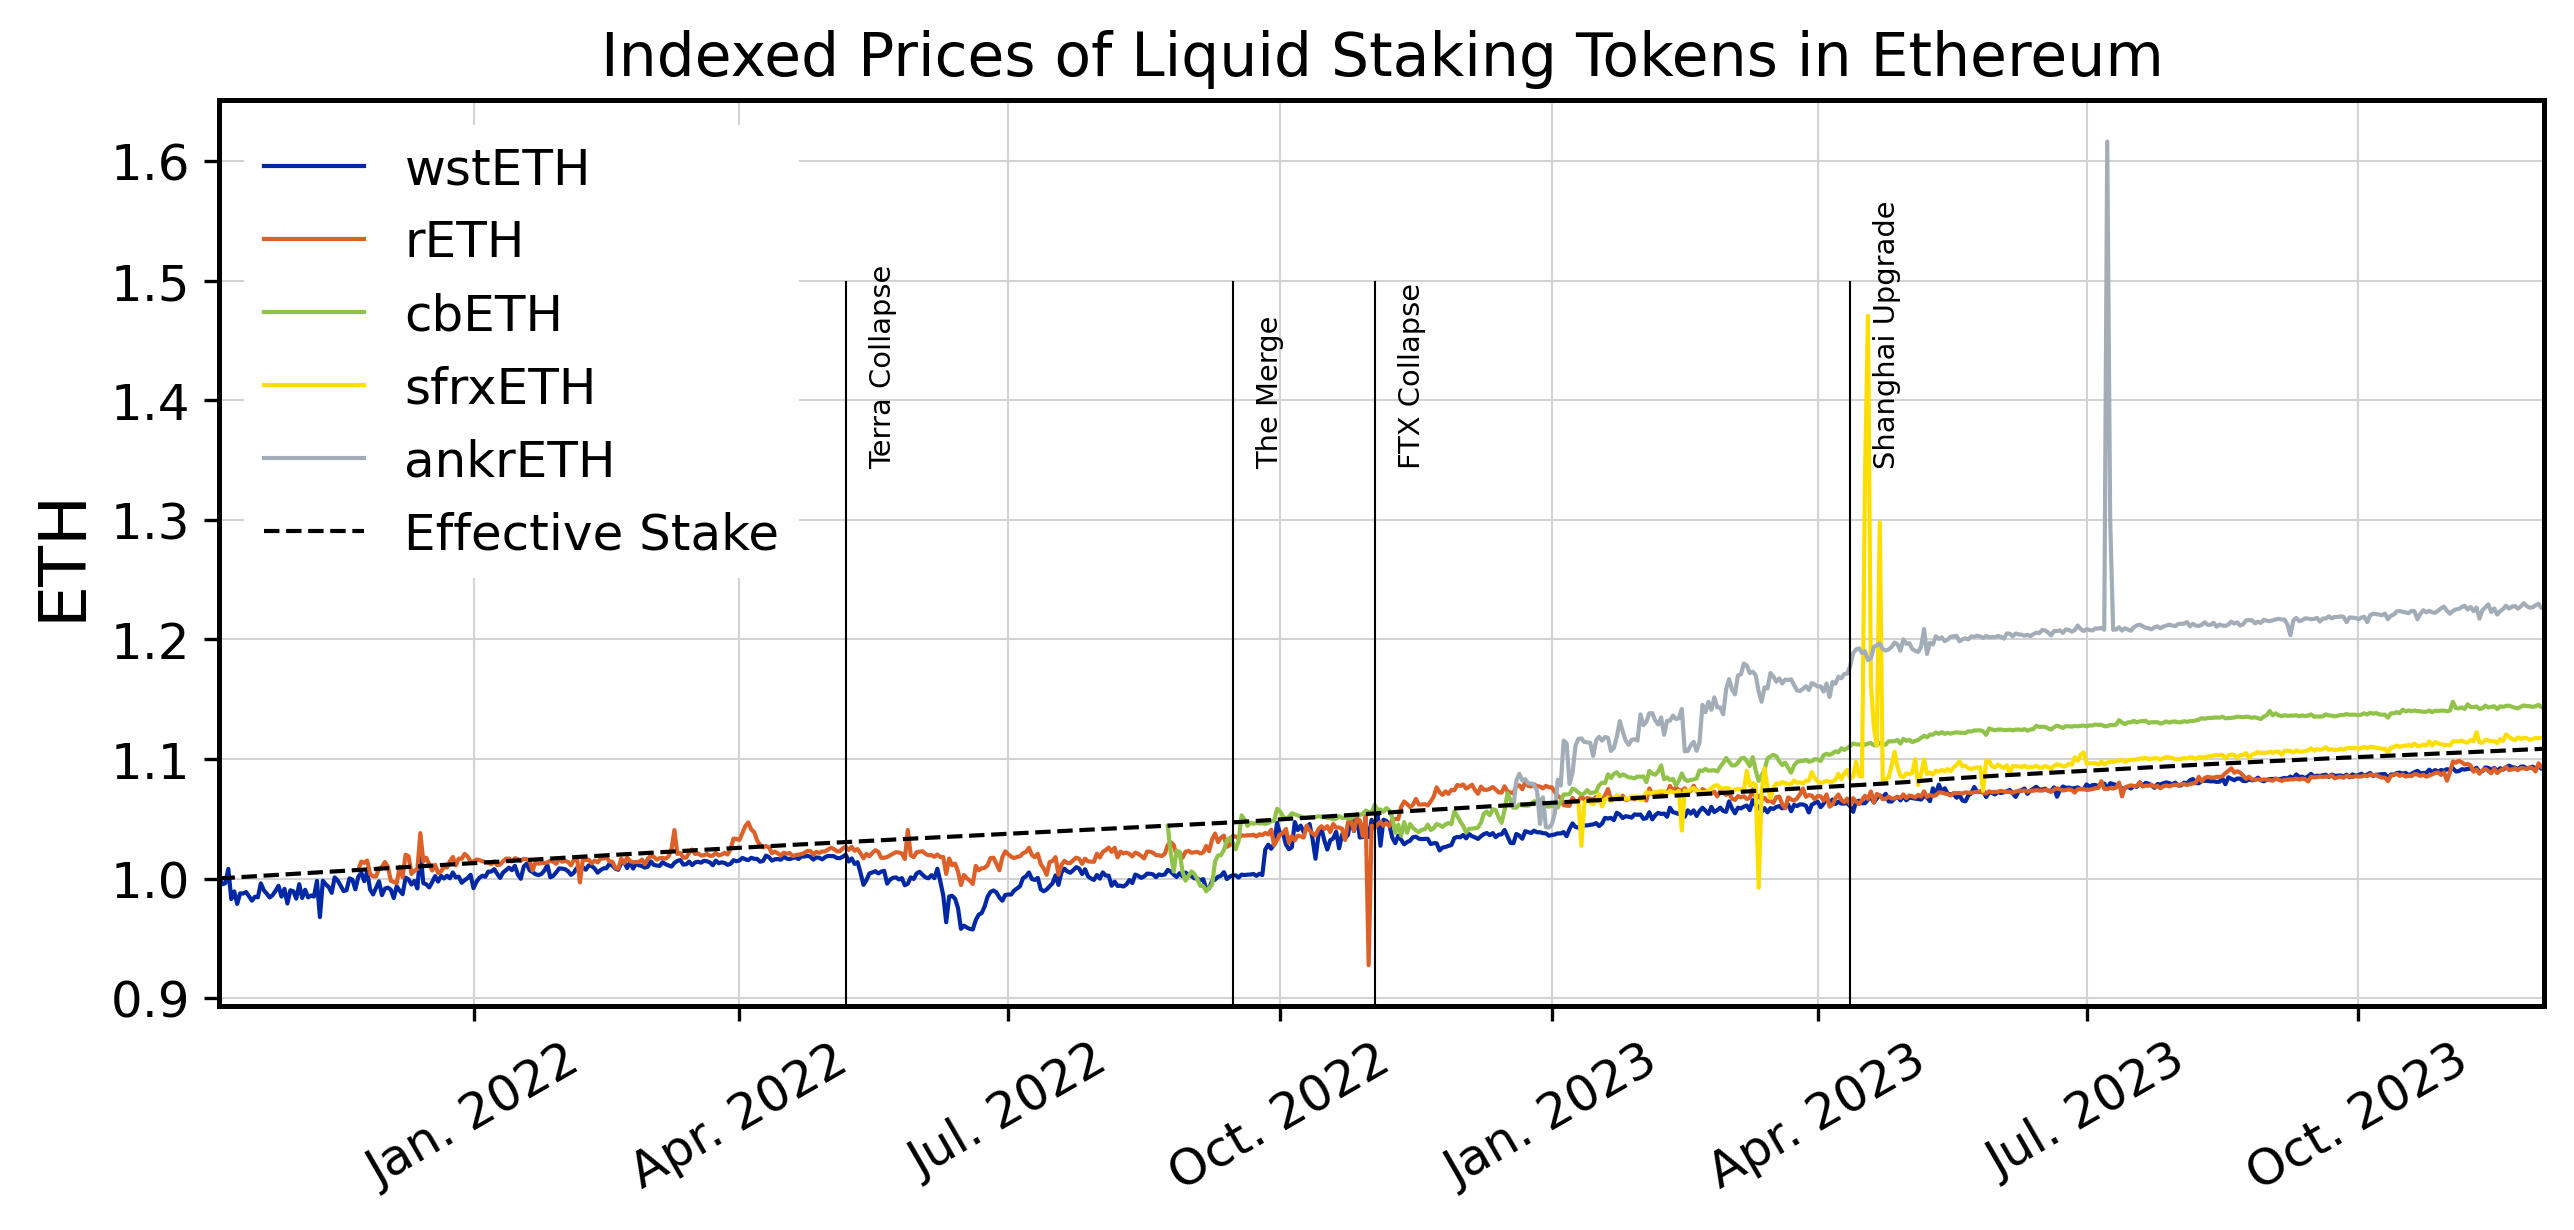

In [53]:
data_to_plot = adjusted_results
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,4),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot.index, data_to_plot[col], lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], color = 'k', lw=1, ls='--', label='Effective Stake')




ax.set_xlim(min(data_to_plot.index), max(data_to_plot.index))
ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')

add_terra_and_ftx(ax, 'both')

ax.set_title('Indexed Prices of Liquid Staking Tokens in Ethereum')
ax.set_ylabel('ETH')

leg = ax.legend(frameon=True,facecolor='white', framealpha=1)
frame = leg.get_frame()
frame.set_linewidth(0)

# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b. %Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='center')

fig.set_facecolor('w')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


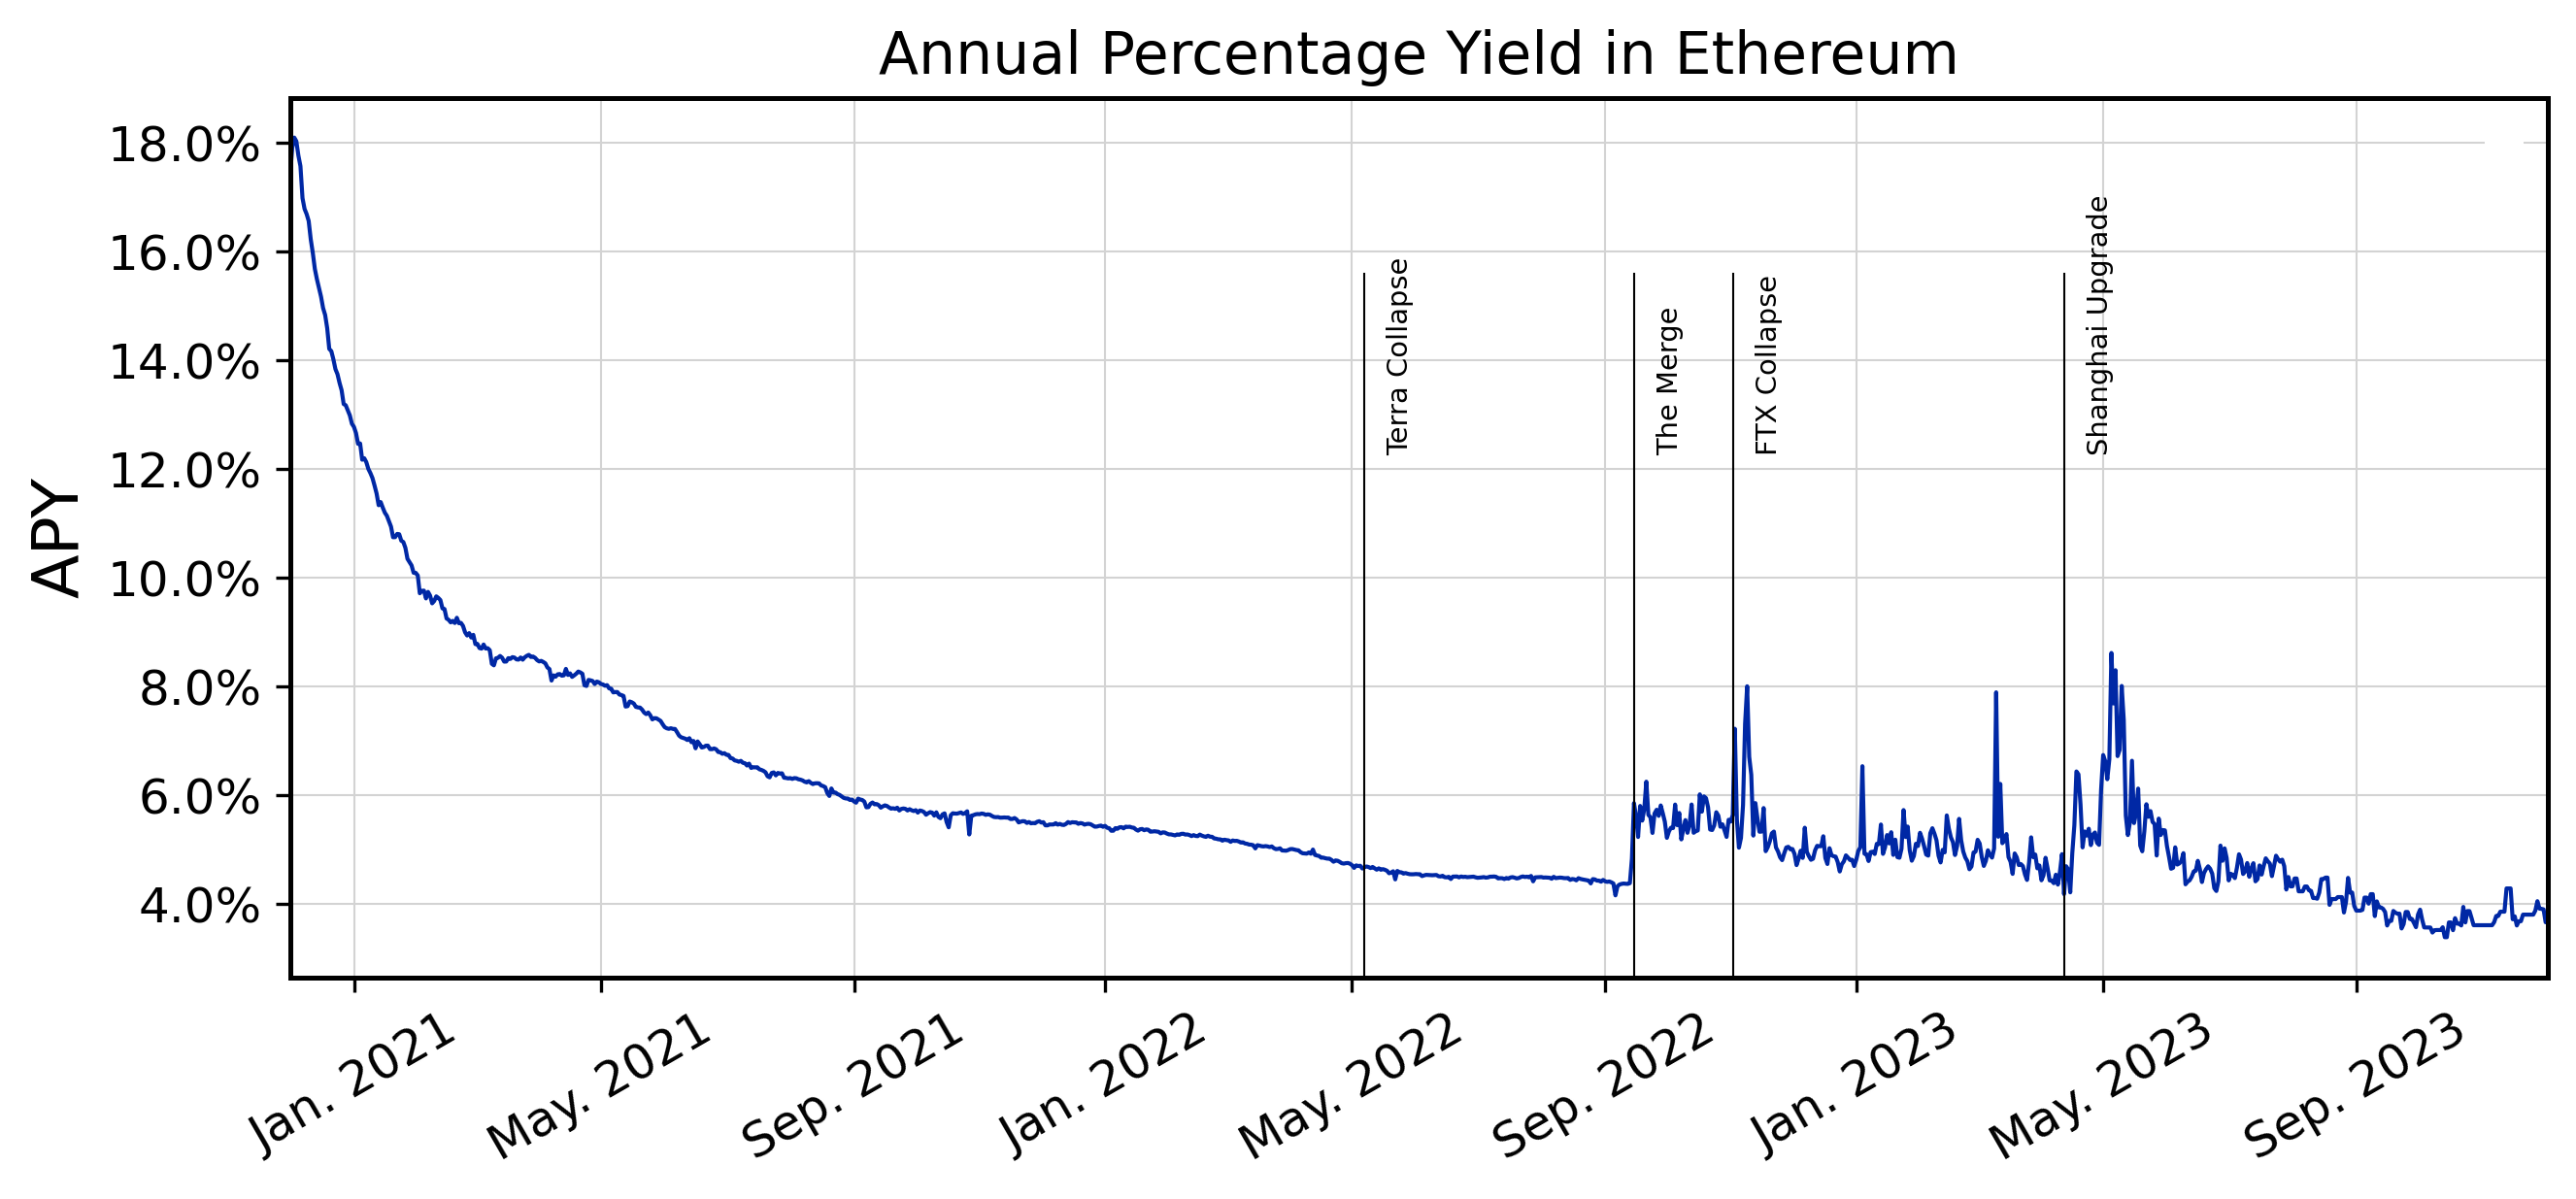

In [54]:
data_to_plot = interest
import matplotlib.ticker as mtick
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,4),dpi =300)

ax.plot(data_to_plot.index, data_to_plot['eth.store'], lw=1)

ax.set_xlim(min(data_to_plot.index), max(data_to_plot.index))
ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')

add_terra_and_ftx(ax, 'both')

ax.set_title('Annual Percentage Yield in Ethereum')
ax.set_ylabel('APY')

leg = ax.legend(frameon=True,facecolor='white', framealpha=1)
frame = leg.get_frame()
frame.set_linewidth(0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b. %Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='center')

fig.set_facecolor('w')

/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


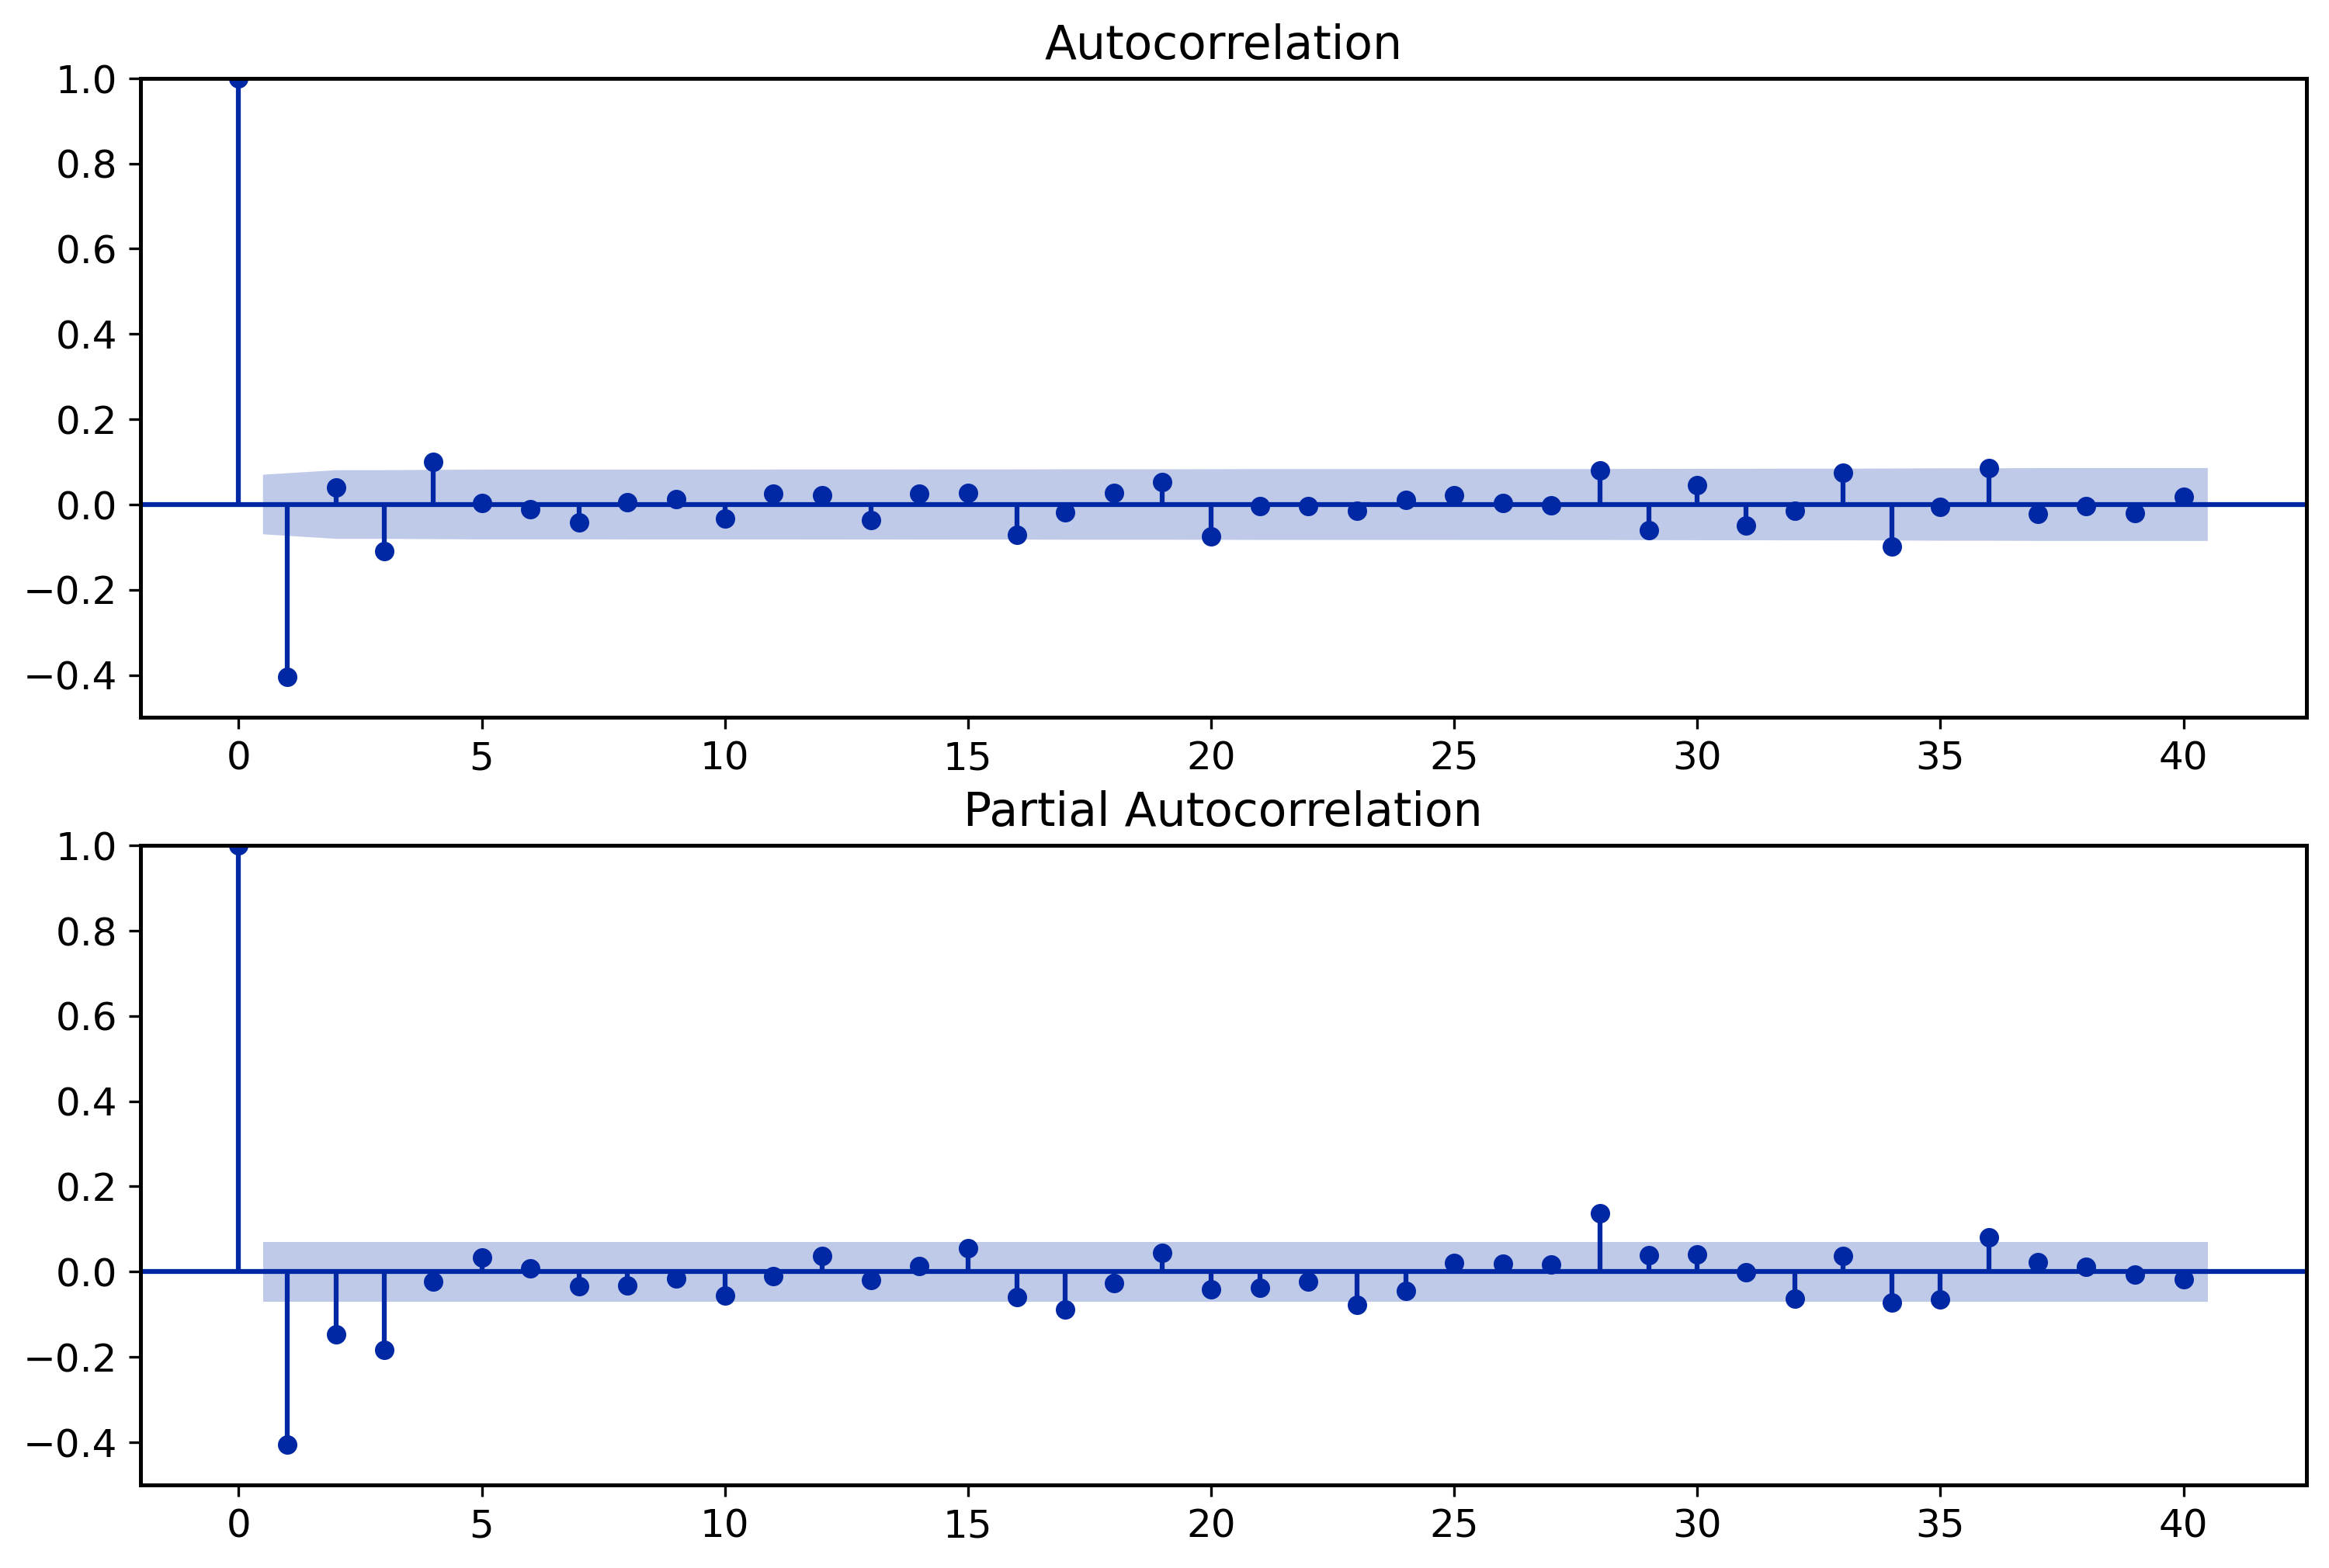

In [55]:
df1 =  adjusted_results

import statsmodels.api as sm
plt.rcParams['figure.figsize']=(12,8)
fig,axs=plt.subplots(2,1)
fig1=sm.graphics.tsa.plot_acf(df1['wstETH'].pct_change(1).dropna(),lags=40,ax=axs[0])
fig2=sm.graphics.tsa.plot_pacf(df1['wstETH'].pct_change(1).dropna(),lags=40,ax=axs[1])

for ax in axs:
    ax.set_ylim(-.5)

In [56]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df1['rETH'].pct_change(1),order=(2,1,3))
model_results=model.fit()
model_results.summary()

/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   rETH   No. Observations:                  788
Model:                 ARIMA(2, 1, 3)   Log Likelihood                2670.936
Date:                Fri, 15 Dec 2023   AIC                          -5329.872
Time:                        11:05:18   BIC                          -5301.863
Sample:                    10-07-2021   HQIC                         -5319.104
                         - 12-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0073      0.286     -3.516      0.000      -1.569      -0.446
ar.L2         -0.0531      0.050     -1.054      0.292      -0.152       0.046
ma.L1         -0.5805      0.285     -2.037      0.042      -1.139      -0.022
ma.L2         -0.9066      0.417     -2.175      0.030      -1.724      -0.090
ma.L3          0.4961      0.135      3.666      0.000       0.231       0.761
sigma2      5.299e-05   8.15e-07     65.006      0.000    5.14e-05    5.46e-05
===================================================================================
Ljung-Box (L1) (Q):                   9.41   Jarque-Bera (JB):            843417.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -6.31
Prob(H) (two-sided):                  0.00   Kurtosis:                       162.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

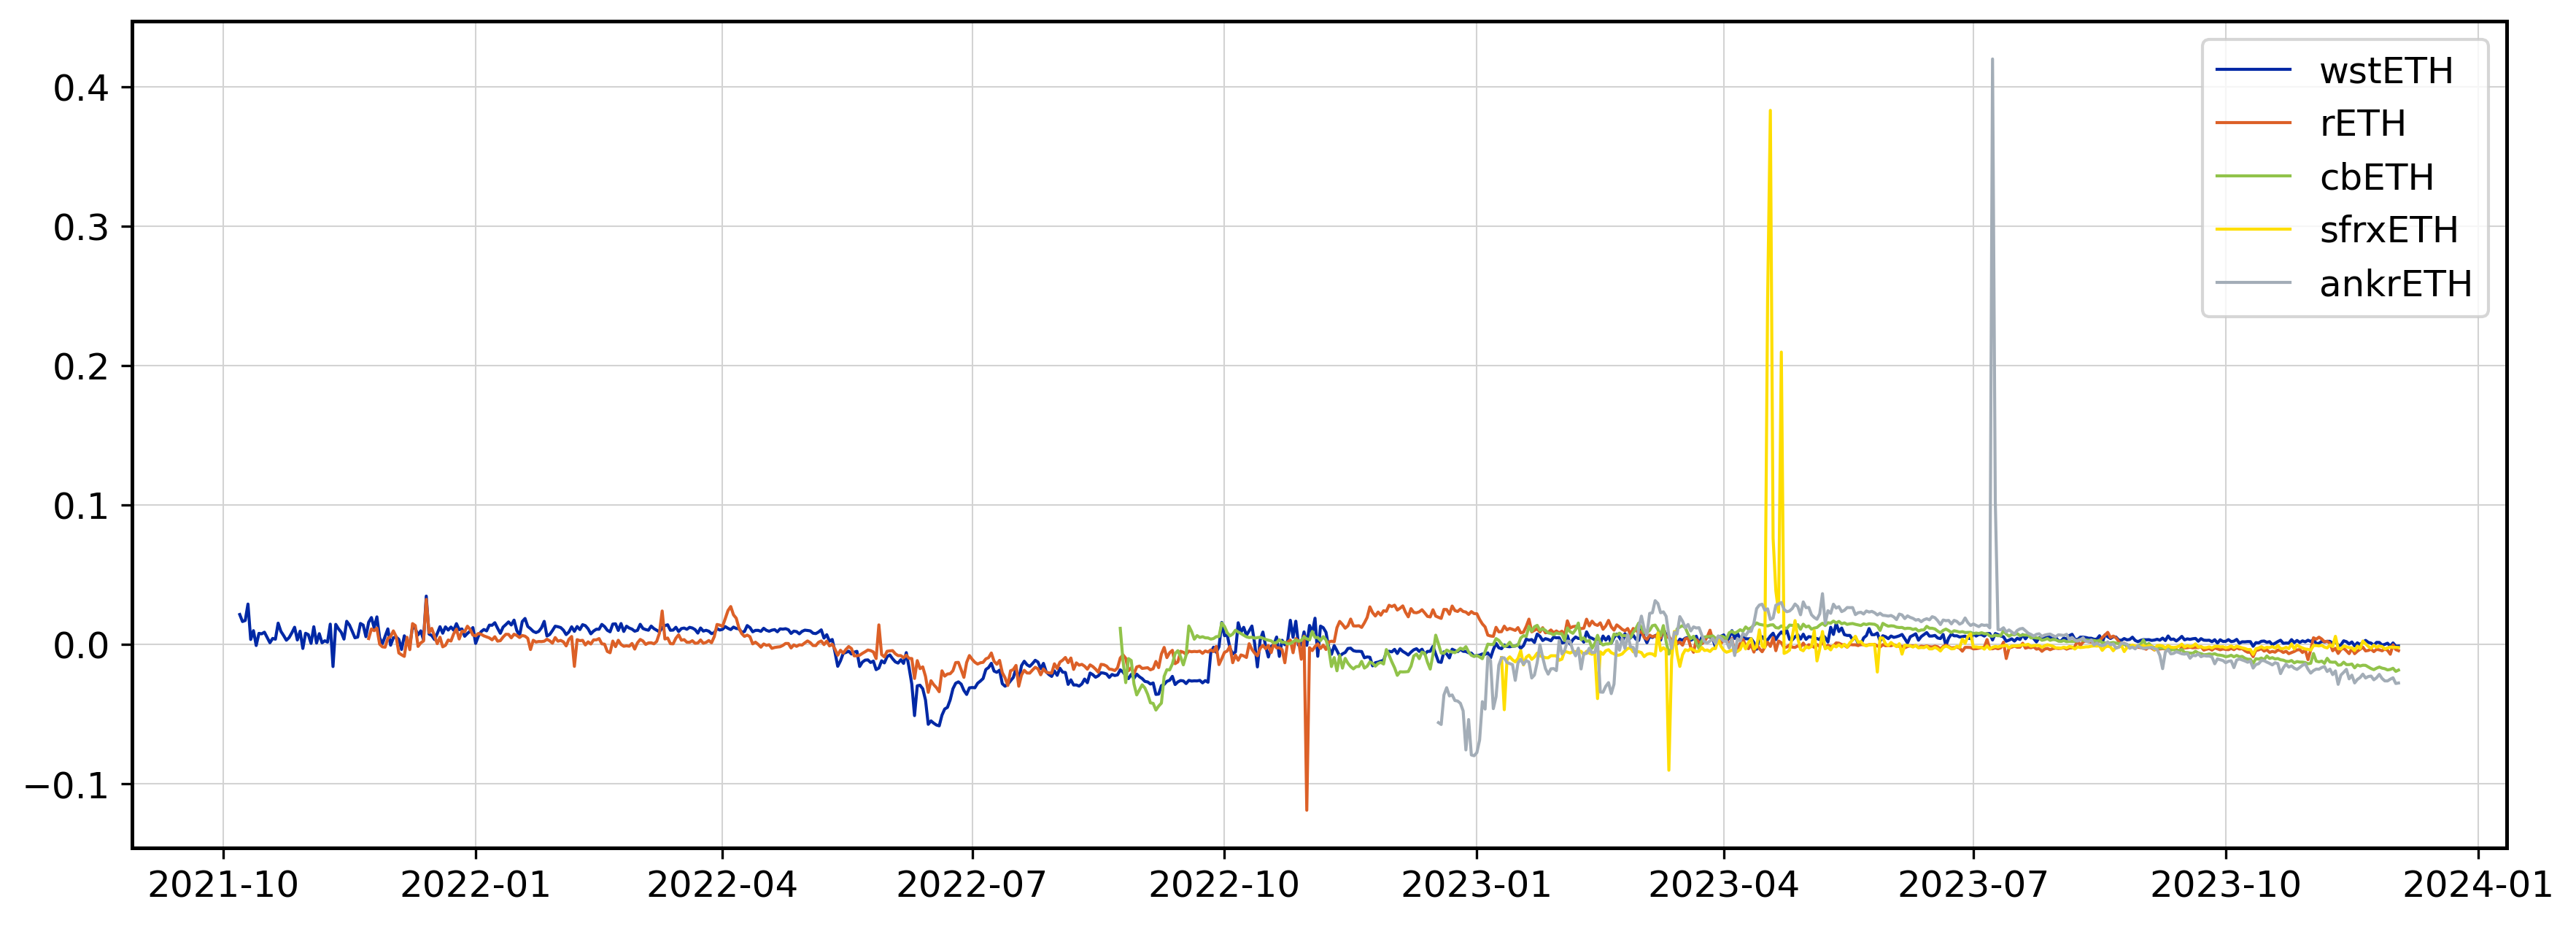

In [22]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = adjusted_results
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot[data_to_plot[col].notnull()].index, signal.detrend(data_to_plot[data_to_plot[col].notnull()][col].values), lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [23]:
data_to_plot[data_to_plot[col].notnull()][col].values

array([1.00015106, 1.00030268, 1.00045407, 1.00060406, 1.00075565,
       1.00090508, 1.00105391, 1.00120458, 1.00135577, 1.00150282,
       1.00164737, 1.00179774, 1.00194907, 1.0021003 , 1.00225149,
       1.00240302, 1.00255483, 1.00270596, 1.00285756, 1.00300998,
       1.00315133, 1.00330169, 1.00345234, 1.0036034 , 1.00375464,
       1.00390582, 1.00405734, 1.00420872, 1.00435966, 1.00451085,
       1.00466192, 1.0048124 , 1.00496241, 1.00511234, 1.00526235,
       1.00541209, 1.00556188, 1.00571177, 1.0058616 , 1.00601148,
       1.00616068, 1.00630993, 1.00645964, 1.00660873, 1.00675637,
       1.0069044 , 1.00705271, 1.00720096, 1.00734846, 1.00749641,
       1.00764377, 1.00779127, 1.00793872, 1.00808687, 1.00823533,
       1.00838316, 1.00853119, 1.00867772, 1.00882425, 1.00897125,
       1.00911824, 1.00926528, 1.00941297, 1.00955998, 1.00970734,
       1.00985431, 1.01000119, 1.01014862, 1.01029697, 1.01044489,
       1.0105932 , 1.01074145, 1.01088969, 1.01103731, 1.01118

In [24]:
adjusted_results 

,wstETH,rETH,cbETH,sfrxETH,ankrETH,daily,daily_accrued
Date,,,,,,,
2021-10-07,1.000151,NaN,NaN,NaN,NaN,1.000151,1.000151
2021-10-08,0.995250,NaN,NaN,NaN,NaN,1.000152,1.000303
2021-10-09,0.996153,NaN,NaN,NaN,NaN,1.000151,1.000454
2021-10-10,1.008068,NaN,NaN,NaN,NaN,1.000150,1.000604
2021-10-11,0.982818,NaN,NaN,NaN,NaN,1.000151,1.000756
...,...,...,...,...,...,...,...
2023-11-29,1.093591,1.092238,1.143543,1.116775,1.226869,1.000105,1.108130
2023-11-30,1.091626,1.089562,1.144166,1.117616,1.228533,1.000105,1.108247
2023-12-01,1.094081,1.096393,1.145310,1.117438,1.229923,1.000105,1.108363


In [25]:
_df = adjusted_results.copy()
excess_returns = adjusted_results.copy()
excess_returns['daily']=_df['daily']-1
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    excess_returns[col] = _df[col].pct_change(1)

for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    excess_returns[col] =  excess_returns[excess_returns[col].notna()][col]-excess_returns['daily']



    

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
_df = adjusted_results.copy()
ret_diff = adjusted_results.copy()
ret_diff['daily']=_df['daily']-1



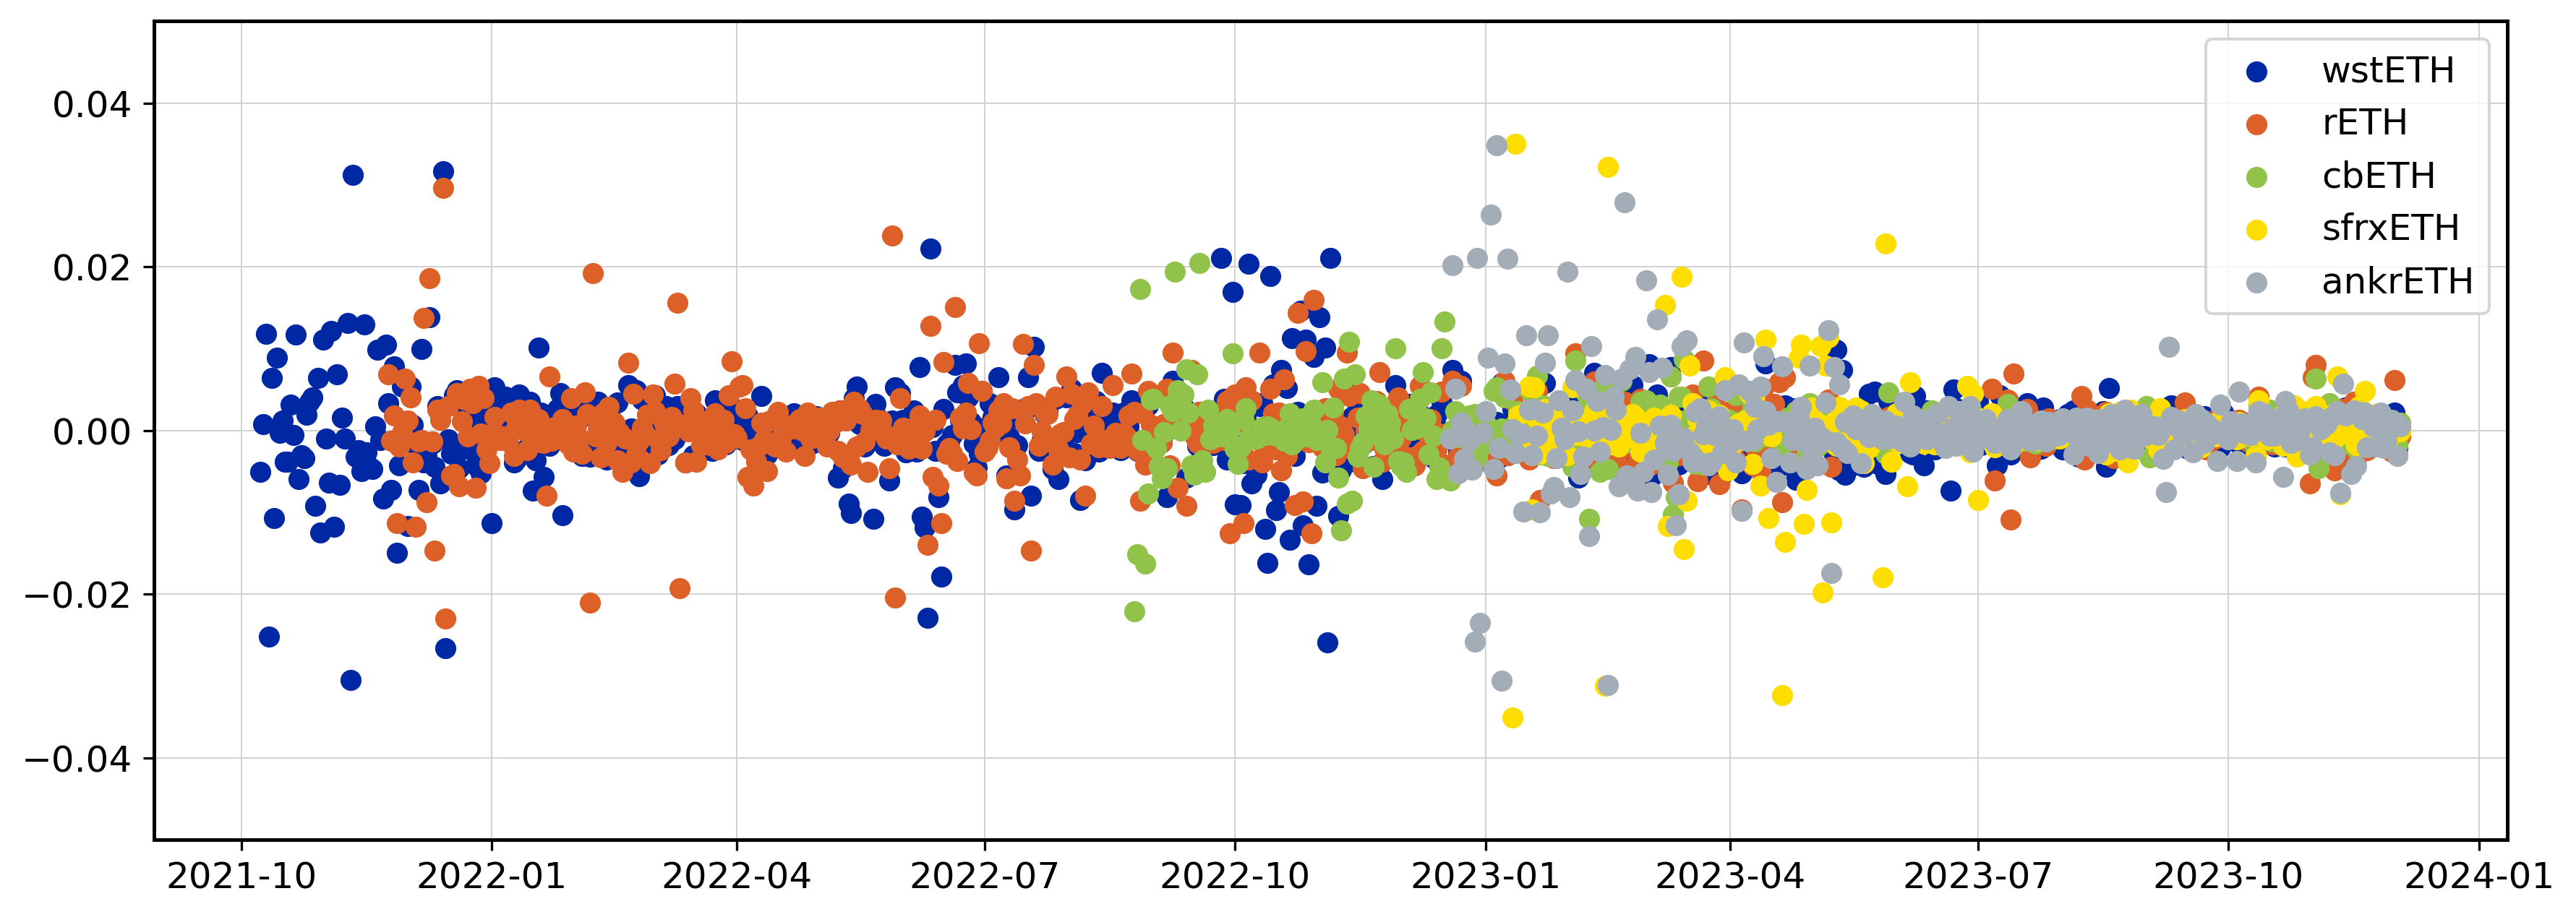

In [27]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.scatter(data_to_plot[col].index, data_to_plot[col], lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.set_ylim(-0.05,0.05)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [28]:
excess_returns.describe()

,wstETH,rETH,cbETH,sfrxETH,ankrETH,daily,daily_accrued
count,787.000000,740.000000,466.000000,327.000000,350.000000,788.000000,788.000000
mean,-0.000006,0.000009,0.000074,0.000309,0.000513,0.000131,1.055550
std,0.005073,0.007657,0.003451,0.023860,0.022083,0.000018,0.031825
min,-0.030461,-0.118650,-0.022145,-0.208735,-0.196054,0.000091,1.000151
25%,-0.001901,-0.001675,-0.000942,-0.001031,-0.001506,0.000120,1.028551
50%,-0.000011,-0.000079,0.000003,-0.000015,0.000074,0.000131,1.054875
75%,0.001912,0.001560,0.000919,0.001092,0.001541,0.000143,1.084265
max,0.031622,0.125663,0.020450,0.229803,0.337856,0.000226,1.108582


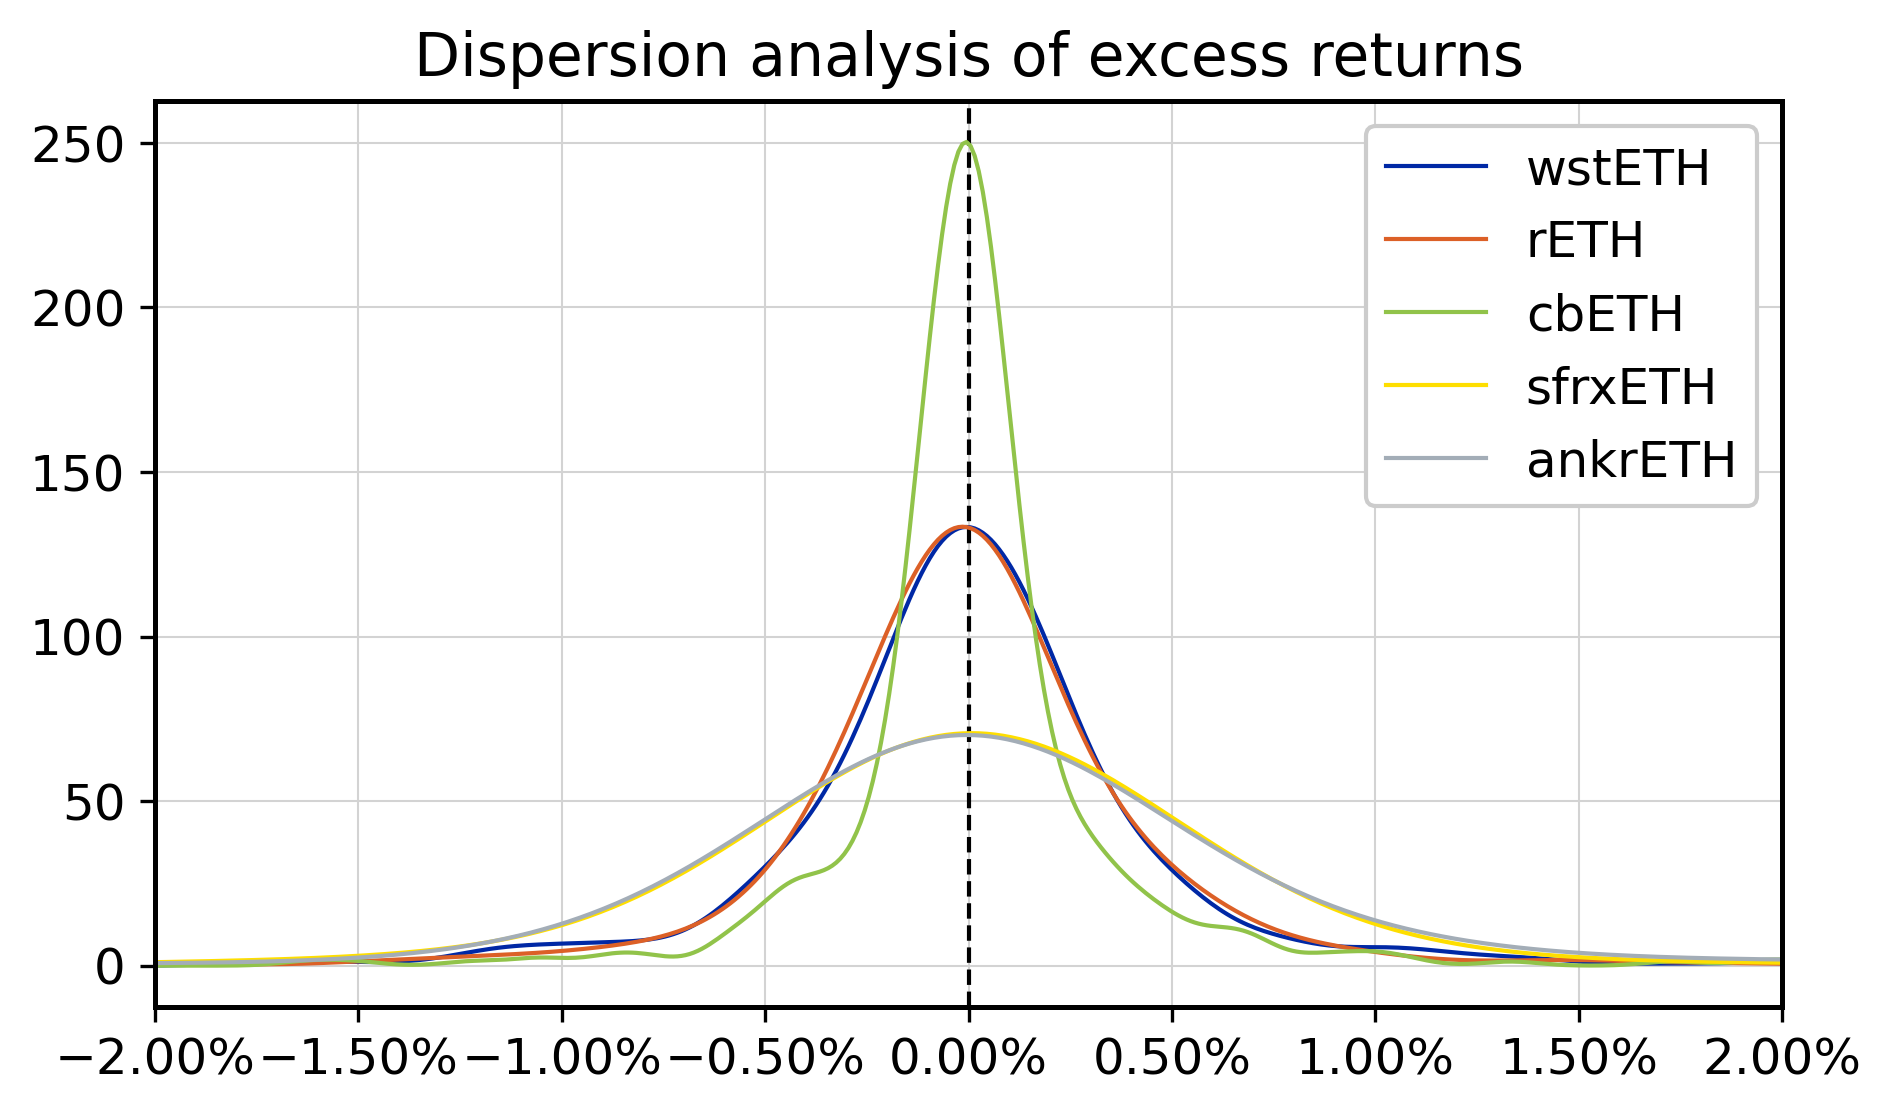

In [34]:
from scipy.stats import gaussian_kde



data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,4),dpi =300)

ax.axvline(0, color='k',lw=1,ls='--')
for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    d = data_to_plot[data_to_plot[col].notnull()][col].values
    density = gaussian_kde(d)

    density.covariance_factor = lambda : 0.2
    density._compute_covariance()
    x = np.linspace(-0.05,0.05,1000)
    
    line = ax.plot(x*100,density(x),lw=1, label=col)
    #ax.fill_between(x,0,density(x), alpha = 0.1, color = line[0].get_color())

ax.set_title('Dispersion analysis of excess returns')
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlim(-2,2)
leg = ax.legend(frameon=True,facecolor='white', framealpha=1)
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [35]:
excess_returns.describe()

,wstETH,rETH,cbETH,sfrxETH,ankrETH,daily,daily_accrued
count,787.000000,740.000000,466.000000,327.000000,350.000000,788.000000,788.000000
mean,-0.000006,0.000009,0.000074,0.000309,0.000513,0.000131,1.055550
std,0.005073,0.007657,0.003451,0.023860,0.022083,0.000018,0.031825
min,-0.030461,-0.118650,-0.022145,-0.208735,-0.196054,0.000091,1.000151
25%,-0.001901,-0.001675,-0.000942,-0.001031,-0.001506,0.000120,1.028551
50%,-0.000011,-0.000079,0.000003,-0.000015,0.000074,0.000131,1.054875
75%,0.001912,0.001560,0.000919,0.001092,0.001541,0.000143,1.084265
max,0.031622,0.125663,0.020450,0.229803,0.337856,0.000226,1.108582


In [32]:
data_reg = pd.concat([excess_returns, interest.daily_ETH_change, interest.monthly_ETH_std, interest.daily_ETH_std_change, np.log(interest.market_cap), np.log(interest.volume)], axis=1, join="inner")
#for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
#    data_reg[col] = adjusted_results[col].pct_change(1)
data_reg

AttributeError: 'DataFrame' object has no attribute 'daily_ETH_change'

In [139]:
data_auto_reg = pd.concat([ret_diff, interest.daily_ETH_change, interest.monthly_ETH_std,interest.daily_ETH_std_change, np.log(interest.market_cap), np.log(interest.volume)], axis=1, join="inner")
for col in tokens:
    data_auto_reg['shift1_'+str(col)] = data_auto_reg[col].shift(1)
    data_auto_reg['shift2_'+str(col)] = data_auto_reg[col].shift(2)
    data_auto_reg['shift3_'+str(col)] = data_auto_reg[col].shift(3)
    data_auto_reg['shift4_'+str(col)] = data_auto_reg[col].shift(4)
    data_auto_reg['shift5_'+str(col)] = data_auto_reg[col].shift(5)
    data_auto_reg['shift6_'+str(col)] = data_auto_reg[col].shift(6)
data_auto_reg

AttributeError: 'DataFrame' object has no attribute 'daily_ETH_change'

In [140]:
#exclude daily as variable since constant 
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from statsmodels.stats.outliers_influence import variance_inflation_factor
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
ols_results = []
for col in tokens:
    df_reg = data_reg[['daily_ETH_change', 'monthly_ETH_std','daily_ETH_std_change', 'market_cap','volume' ,str(col) ]].dropna()
    X = df_reg[['daily_ETH_change', 'monthly_ETH_std','daily_ETH_std_change', 'market_cap', 'volume']]
    y = df_reg[str(col)]
    #demean data
    X = X - X.mean()
    X = sm.add_constant(X)
                            
    #Calculate and print variance inflation factor (VIF)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]
    print(vif_data)
    model_ols = sm.OLS(y,X)
    ols_res = model_ols.fit(cov_type='HAC', cov_kwds={'maxlags':10})
    ols_results.append(ols_res)
    print(ols_res.summary())
stargazer_excess = Stargazer(ols_results)
print(stargazer_excess.render_latex())
HTML(stargazer_excess.render_html())

ModuleNotFoundError: No module named 'stargazer'

In [60]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from statsmodels.stats.outliers_influence import variance_inflation_factor
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
ols_results = []
for col in tokens:
    df_auto_reg = data_auto_reg[['daily_ETH_change', 'monthly_ETH_std', 'market_cap', 'volume' ,str(col),'shift1_'+str(col),'daily_ETH_std_change',
                                 'shift2_'+str(col),'shift3_'+str(col),'shift4_'+str(col),'shift5_'+str(col),'shift6_'+str(col) ]].dropna()
    X = df_auto_reg[['shift1_'+str(col),'shift2_'+str(col),'shift3_'+str(col),'shift4_'+str(col),'shift5_'+str(col),'shift6_'+str(col),'daily_ETH_change', 'monthly_ETH_std','daily_ETH_std_change', 'market_cap', 'volume']]
    #demean data
    X = X - X.mean()
    X.rename(columns={'shift1_'+str(col):'shift1','shift2_'+str(col):'shift2','shift3_'+str(col):'shift3','shift4_'+str(col):'shift4','shift5_'+str(col):'shift5','shift6_'+str(col):'shift6'}, inplace = True)
    y = df_auto_reg[str(col)]
    X = sm.add_constant(X)
                        
    #Calculate and print variance inflation factor (VIF)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]
    print(vif_data)
    model_ols = sm.OLS(y,X)
    ols_res = model_ols.fit(cov_type='HAC', cov_kwds={'maxlags':10})
    ols_results.append(ols_res)
    print(ols_res.summary())

stargazer_premium = Stargazer(ols_results)
print(stargazer_premium.render_latex())
HTML(stargazer_premium.render_html())

                 feature       VIF
0                  const  1.000000
1                 shift1  7.988102
2                 shift2  9.797196
3                 shift3  9.767393
4                 shift4  9.889578
5                 shift5  9.673006
6                 shift6  7.742905
7       daily_ETH_change  1.014304
8        monthly_ETH_std  1.674924
9   daily_ETH_std_change  1.191476
10            market_cap  2.497020
11                volume  1.949143
                            OLS Regression Results                            
Dep. Variable:                 wstETH   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     316.9
Date:                Tue, 16 May 2023   Prob (F-statistic):          7.32e-225
Time:                        18:28:46   Log-Likelihood:                 2089.5
No. Observations:                 542   AIC:                           

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin